# Credit EDA Case Study

### Data Overview
This notebook uses two datasets:-

- `'application_data.csv'` contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.

- `'previous_application.csv'` contains information about the client’s previous loan data. It contains the data whether the previous application had been **Approved, Cancelled, Refused or Unused offer**.

## Data Sourcing

In [3]:
# import application_data.csv

#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)
 
#please change the path as per your local machine 

application_data_path = "g:\\ds\\Credit EDA Case Study\\application_data.csv"
previous_application_path = "g:\\ds\\Credit EDA Case Study\\previous_application.csv"

#Importing the data
df_app_data = pd.read_csv(application_data_path)

# Starting with analysis of Application data

# dataset info and some details 
print(df_app_data.shape)
print('\n')
print(df_app_data.info())


(307511, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
SK_ID_CURR             307511 non-null int64
TARGET                 307511 non-null int64
NAME_CONTRACT_TYPE     307511 non-null object
CODE_GENDER            307511 non-null object
FLAG_OWN_CAR           307511 non-null object
FLAG_OWN_REALTY        307511 non-null object
CNT_CHILDREN           307511 non-null int64
AMT_INCOME_TOTAL       307511 non-null float64
AMT_CREDIT             307511 non-null float64
AMT_ANNUITY            307499 non-null float64
AMT_GOODS_PRICE        307233 non-null float64
NAME_TYPE_SUITE        306219 non-null object
NAME_INCOME_TYPE       307511 non-null object
NAME_EDUCATION_TYPE    307511 non-null object
NAME_FAMILY_STATUS     307511 non-null object
NAME_HOUSING_TYPE      307511 non-null object
DAYS_BIRTH             307511 non-null int64
DAYS_EMPLOYED          307511 non-null int64
OCCUPATION_TYPE        211120 non-null object
C

In [4]:
#Highlevel details of data each column contains in application_data.csv
df_app_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,306219,307511,307511,307511,307511,307511.000000,307511.000000,211120,307509.000000,307511
unique,nan,nan,2,3,2,2,nan,nan,nan,nan,nan,7,8,5,6,6,nan,nan,18,nan,58
top,nan,nan,Cash loans,F,N,Y,nan,nan,nan,nan,nan,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,nan,nan,Laborers,nan,Business Entity Type 3
freq,nan,nan,278232,202448,202924,213312,nan,nan,nan,nan,nan,248526,158774,218391,196432,272868,nan,nan,55186,nan,67992
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,NaN,NaN,NaN,NaN,NaN,-16036.995067,63815.045904,NaN,2.152665,NaN
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,237123.146279,402490.776996,14493.737315,369446.460540,NaN,NaN,NaN,NaN,NaN,4363.988632,141275.766519,NaN,0.910682,NaN
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,NaN,NaN,NaN,NaN,NaN,-25229.000000,-17912.000000,NaN,1.000000,NaN
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,NaN,NaN,NaN,NaN,NaN,-19682.000000,-2760.000000,NaN,2.000000,NaN
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,NaN,NaN,NaN,NaN,NaN,-15750.000000,-1213.000000,NaN,2.000000,NaN
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,202500.000000,808650.000000,34596.000000,679500.000000,NaN,NaN,NaN,NaN,NaN,-12413.000000,-289.000000,NaN,3.000000,NaN


In [3]:
#Glimps of data in application_data.csv
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

## Data Cleaning and Manipulation

**Calculate percentage of missing values of all columns**

In [4]:
round(100*(df_app_data.isnull().sum()/len(df_app_data.index)),2)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090000
NAME_TYPE_SUITE                 0.420000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

__Remove the columns with missing values more than 40%__

In [5]:
# remove columns with high missing percentage

df_missing = round(100*(df_app_data.isnull().sum()/len(df_app_data.index)),2)

# column with more than 40% missing values

column = df_missing[df_missing > 40].index 

# remove/drop columns with high percentage

df_app_data.drop(column,axis = 1,inplace = True)


### Derive Metrics to Impute missing values

#### 1. AMT_GOODS_PRICE (Numerical) > 0.09%

If we analyse application data file for NAME_CONTRACT_TYPE = Revolving loans, for all the entries where data is available, AMT_CREDIT is equal to AMT_GOODS_PRICE. The rows for which AMT_GOODS_PRICE is null/blank are for NAME_CONTRACT_TYPE = Revolving loans. Hence, will impute data for missing values for AMT_GOODS_PRICE with respective row's AMT_CREDIT value.  

`df_app_data.loc[pd.isnull(df_app_data['AMT_GOODS_PRICE']),'AMT_GOODS_PRICE'] = df_app_data['AMT_CREDIT']`

check if AMT_GOODS_PRICE null values are imputed

`sum(pd.isnull(df_app_data['AMT_GOODS_PRICE']))`


#### 2. NAME_TYPE_SUITE (Categorical) > 0.42%
**Logic** : There are only two possibilities client is accompanied with somebody or came alone whilst applying for loan, hence whereever this field is blank,we will fill it with "Unaccompanied" categorical value

`df_app_data.loc[pd.isnull(df_app_data['NAME_TYPE_SUITE']),'NAME_TYPE_SUITE'] = "Unaccompanied"`

check if NAME_TYPE_SUITE null values are imputed

`sum(pd.isnull(df_app_data['NAME_TYPE_SUITE']))`

#### 3. OCCUPATION_TYPE(Categorical) > 31.35%
**Assumption:** We are assuming, the Occupation type which is not listed in the application form are kept blank, hence will impute null values with categorical value "Others"

`df_app_data.loc[pd.isnull(df_app_data['OCCUPATION_TYPE']),'OCCUPATION_TYPE'] = "Others"`

check if OCCUPATION_TYPE null values are imputed

`sum(pd.isnull(df_app_data['OCCUPATION_TYPE']))`

#### 4. OBS_30_CNT_SOCIAL_CIRCLE (Categorical/Numerical) > 0.33%

Considering its meaning this is categorical column, we can categorise loan application where OBS_30_CNT_SOCIAL_CIRCLE is 1, 2 or 3 or so on.

Also, this field can be used as numerical to find how many OBS_30_CNT_SOCIAL_CIRCLE found for target = 1 compared to target = 0

**Logic** : If we see categorywise, maximum(more than 60%) applicants have OBS_30_CNT_SOCIAL_CIRCLE = 0, hence , we will impute null values with mode value for column OBS_30_CNT_SOCIAL_CIRCLE 

`df_app_data.loc[pd.isnull(df_app_data['OBS_30_CNT_SOCIAL_CIRCLE']),'OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()`

check if OBS_30_CNT_SOCIAL_CIRCLE null values are imputed

`sum(pd.isnull(df_app_data['OBS_30_CNT_SOCIAL_CIRCLE']))`

#### 5. AMT_REQ_CREDIT_BUREAU_HOUR (Categorical/Numerical) > 13.50%

Considering its meaning this is categorical column, we can categorise loan application where AMT_REQ_CREDIT_BUREAU_HOUR(Number of enquiries to Credit bureau) is 1, 2 or 3 or so on.

Also, this field can be used as numerical to find how many AMT_REQ_CREDIT_BUREAU_HOUR found for target = 1 compared to target = 0

**Logic** : If we see categorywise, maximum(more than 60%) applicants have AMT_REQ_CREDIT_BUREAU_HOUR = 0, hence , we will impute null values with mode value for column AMT_REQ_CREDIT_BUREAU_HOUR

`df_app_data.loc[pd.isnull(df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR']),'AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()`

check if AMT_REQ_CREDIT_BUREAU_HOUR null values are imputed

`sum(pd.isnull(df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR']))`

### Datatype check for all columns

In [5]:
#select only identified columns from dataset
Col_dtype = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']
df_app_data[Col_dtype].dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
dtype: object

In [86]:
#SK_ID_CURR is application ID so it can be converted to String
df_app_data['SK_ID_CURR'] = df_app_data['SK_ID_CURR'].astype('str')

In [13]:
#TARGET is column on which we are dividing our datasets for analysis,hing hence we are converting it to the string
df_app_data['TARGET'] = df_app_data['TARGET'].astype('str')
df_app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
# CNT_FAM_MEMBERS is count of family members so it should be integer.

# impute null values with mode for CNT_FAM_MEMBERS, we need this column in further analysis
# Note there are only 2 rows with nan value, so it will not make any difference if we impute it with mode value which is 2.0 
df_app_data['CNT_FAM_MEMBERS'].mode()
df_app_data.loc[pd.isnull(df_app_data['CNT_FAM_MEMBERS']),'CNT_FAM_MEMBERS'] = 2.0

# change it to int datatype as its a number of family members and its should be in integr.
df_app_data['CNT_FAM_MEMBERS'] = df_app_data['CNT_FAM_MEMBERS'].astype('int')
df_app_data['CNT_FAM_MEMBERS'].value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

### Outliers Treatment

For outliers check, we will check by plotting the box plot of respective columns. Will perform the outliers check on following columns:

1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. AGE
6. YEARS_WRK_EXP


#### 1. AMT_INCOME_TOTAL

Text(0.5, 1.0, 'AMT_INCOME_TOTAL (With Outliers)')

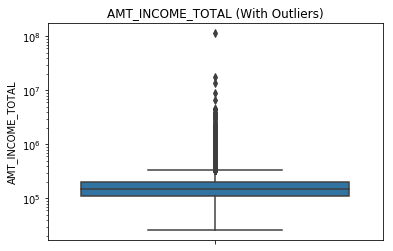

In [10]:
#Plotting the box plot 
plt.yscale('log')#changing to logarithmic scale
sns.boxplot(y=df_app_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL (With Outliers)")


Perform IQR method to treat outliers of AMT_INCOME_TOTAL

In [11]:
#Let's calculate IQR and multiplying with 1.5
IQR1=(df_app_data.AMT_INCOME_TOTAL.quantile(0.75)-df_app_data.AMT_INCOME_TOTAL.quantile(0.25))


#As we can see from the above plot, we have outliers at higher quantile. Adding the IQR1 value to the higher quantile 
outlier1=(1.5 * IQR1) + df_app_data.AMT_INCOME_TOTAL.quantile(0.75)
outlier1

337500.0

Values above this value are treated as outliers for this column

Text(0.5, 1.0, 'AMT_INCOME_TOTAL (Outliers Treated)')

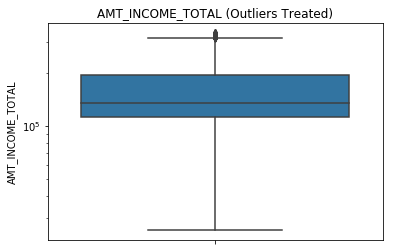

In [12]:
#Let's remove the outliers from the AMT_INCOME_TOTAL column and check plotting the box plot again
df_app_data=df_app_data[df_app_data.AMT_INCOME_TOTAL < outlier1]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL (Outliers Treated)")


#### 2. AMT_CREDIT

Text(0.5, 1.0, 'AMT_CREDIT (With Outliers)')

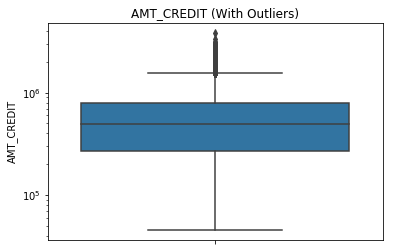

In [13]:
#Let's perform the above steps for treating this column too
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_CREDIT'])
plt.title("AMT_CREDIT (With Outliers)")


In [14]:
IQR2=(df_app_data.AMT_CREDIT.quantile(0.75)-df_app_data.AMT_CREDIT.quantile(0.25)) * 1.5
outlier2= IQR2 + df_app_data.AMT_CREDIT.quantile(0.75)
outlier2

1562827.5

Text(0.5, 1.0, 'AMT_CREDIT (Outliers Treated)')

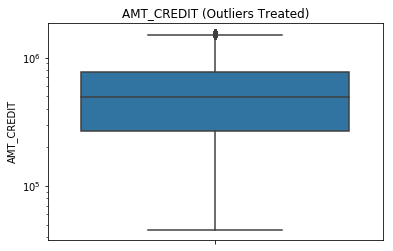

In [15]:
df_app_data=df_app_data[df_app_data.AMT_CREDIT < outlier2]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_CREDIT'])
plt.title("AMT_CREDIT (Outliers Treated)")


#### 3. AMT_ANNUITY

Text(0.5, 1.0, 'AMT_ANNUITY (With Outliers)')

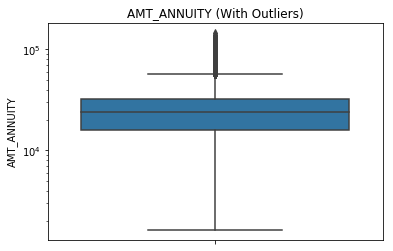

In [16]:
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY (With Outliers)")


In [17]:
IQR3=(df_app_data.AMT_ANNUITY.quantile(0.75))-(df_app_data.AMT_ANNUITY.quantile(0.25)) 
outlier3= (1.5 * IQR3) + df_app_data.AMT_ANNUITY.quantile(0.75)
outlier3

57368.25

Text(0.5, 1.0, 'AMT_ANNUITY (Outliers Treated)')

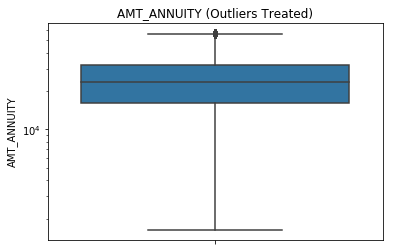

In [18]:
df_app_data=df_app_data[df_app_data.AMT_ANNUITY < outlier3]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY (Outliers Treated)")


#### 4. AMT_GOODS_PRICE

Text(0.5, 1.0, 'AMT_GOODS_PRICE (With Outliers)')

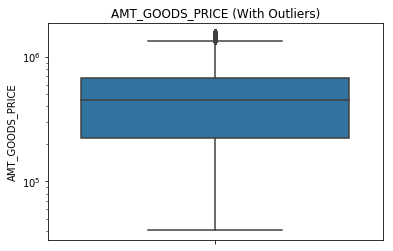

In [19]:
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE (With Outliers)")


In [20]:
IQR4=(df_app_data.AMT_GOODS_PRICE.quantile(0.75)-df_app_data.AMT_GOODS_PRICE.quantile(0.25)) * 1.5
outlier4= IQR4 + df_app_data.AMT_GOODS_PRICE.quantile(0.75)
outlier4

1350000.0

Text(0.5, 1.0, 'AMT_GOODS_PRICE (Outliers Treated)')

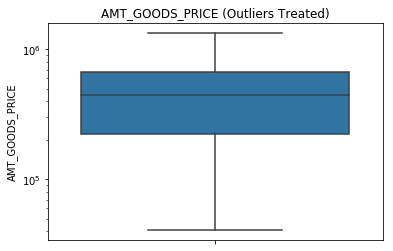

In [21]:
df_app_data=df_app_data[df_app_data.AMT_GOODS_PRICE < outlier4]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE (Outliers Treated)")


#### Creating some calculated fields

In [8]:
# converting number of days to age of the client

# creating new variable for age of the client at the time of application

df_app_data['DAYS_BIRTH'] = abs((df_app_data['DAYS_BIRTH']/365)).astype(int)

# converting number of days of emplyment to years years of experience at the time of loan application

# creating new variable for years of work experienc of the client at the time of application 

df_app_data['DAYS_EMPLOYED'] = abs((df_app_data['DAYS_EMPLOYED']/365)).astype(int)

df_app_data.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_WRK_EXP'},inplace = True)
df_app_data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                      int32
YEARS_WRK_EXP            int32
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
Cat_AMT_CREDIT          object
dtype: object

#### 5. AGE

Text(0.5, 1.0, 'AGE OF THE CLIENT')

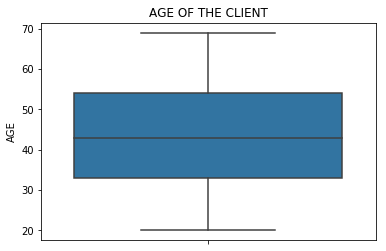

In [23]:
sns.boxplot(y=df_app_data['AGE'])
plt.title("AGE OF THE CLIENT")


There are no outliers present in the Age column. No need for further treatment

#### 6. YEARS_WRK_EXP

Text(0.5, 1.0, 'WORK EXPERIENCE OF THE CLIENT')

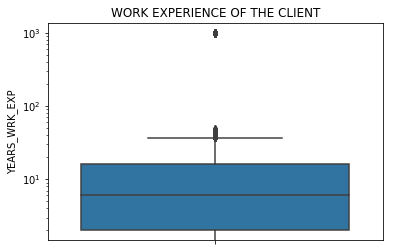

In [24]:
plt.yscale('log')
sns.boxplot(y=df_app_data['YEARS_WRK_EXP'])
plt.title("WORK EXPERIENCE OF THE CLIENT")

In [57]:
IQR5=(df_app_data.YEARS_WRK_EXP.quantile(0.75)-df_app_data.YEARS_WRK_EXP.quantile(0.25)) * 1.5
outlier5= IQR5 + df_app_data.YEARS_WRK_EXP.quantile(0.75)
outlier5

34.5

Text(0.5, 1.0, 'WORK EXPERIENCE OF THE CLIENT (Outliers Treated)')

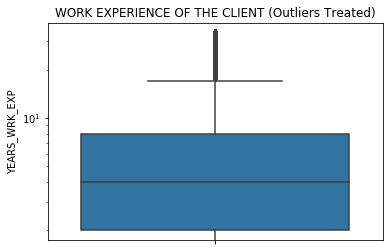

In [58]:
df_app_data=df_app_data[df_app_data.YEARS_WRK_EXP < outlier5]

plt.yscale('log')
sns.boxplot(y=df_app_data['YEARS_WRK_EXP'])
plt.title("WORK EXPERIENCE OF THE CLIENT (Outliers Treated)")

### Binning of Continous variable

##### Columns selected are as below :
1. AMT_CREDIT              
2. AGE

In [10]:
#1. AMT_CREDIT

#Categorise the applicants into four groups based on the AMT_CREDIT value (Low, Medium, High, Premium, where Premium would have the highest Amount_Credit and low would have low Amount Credit value).
#Using AMT_CREDIT categories we can easily find which group has maximum number of applicants.

#Lets decide the categories  
def category(x) : 
    if x <= 250000 :
        return 'Low'
    if (x > 250000) & (x <= 500000) :
        return 'Medium'
    if (x > 500000) & (x <= 800000) :
        return 'High'
    if x > 800000 :
        return 'Premium'
# Categorise based on categories above
df_app_data['Cat_AMT_CREDIT'] = df_app_data['AMT_CREDIT'].apply(category)
df_app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Cat_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1.000000,Business Entity Type 3,Medium
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.000000,School,Premium
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1.000000,Government,Low
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Laborers,2.000000,Business Entity Type 3,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Core staff,1.000000,Religion,High


Text(0.5, 0.98, 'Percentage Distribution of Credit Amount')

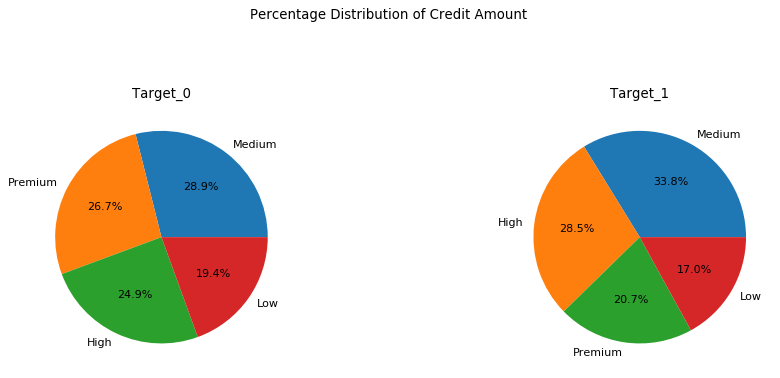

In [29]:
#Lets see how it shows data for TARGET column

# plot AMOUNT_CREDIT values category across TARGET

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.0, wspace=0.8)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
df_app_data[df_app_data['TARGET']== '0'].Cat_AMT_CREDIT.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
df_app_data[df_app_data['TARGET']== '1'].Cat_AMT_CREDIT.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Credit Amount")
plt.show()

1.There is no huge difference in % distribution of AMT_CREDIT over applicant having payment difficulties or not.<br>
2.But, for Target = 1,after Medium category, category High is contributing with 28.5% followed by Premium category (20.7%).Reverse is case for Target = 0, after Medium category, category Premium is contributing with 26.7% followed by High category (24.9%).<br>
3.However, highest number of applicants having payment difficulties belong to Medium category ((Amt_credit > 500000) & (Amt_credit <= 800000)

In [11]:
#2. AGE
#Categorise the applicants into four groups based on the AGE value (20s, 30s, 40s, 50s, Senior_Citizen). 

#Lets decide the categories  
def age(x) :
    if x <= 29 :
        return '20s'
    if x<= 39 :
        return '30s'
    if x<= 49 :
        return '40s'
    if x<= 59 :
        return '50s'
    if x>= 60 :
        return 'Senior_Citizen'
# Categorise based on categories above
df_app_data['AGE_Cat'] = df_app_data['AGE'].apply(age)
df_app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Cat_AMT_CREDIT,AGE_Cat
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1.000000,Business Entity Type 3,Medium,20s
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2.000000,School,Premium,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1.000000,Government,Low,50s
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Laborers,2.000000,Business Entity Type 3,Medium,50s
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Core staff,1.000000,Religion,High,50s


Text(0.5, 0.98, 'Percentage Distribution of AGE across Defaulters and Non Defaulters')

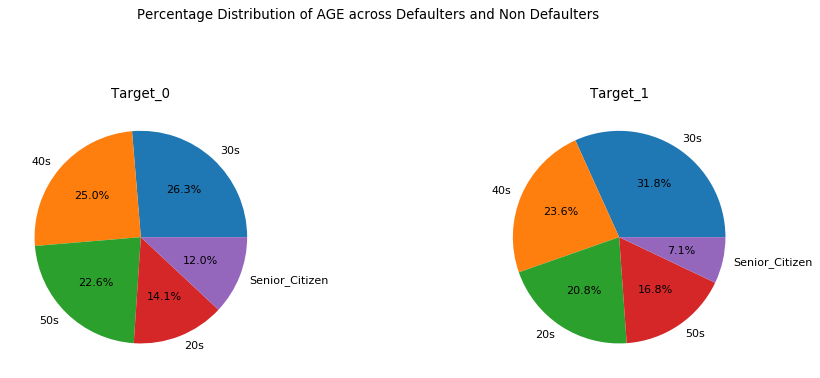

In [30]:
#Lets see how it shows data for TARGET column

# plot AGE values category across TARGET

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.0, wspace=0.8)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
df_app_data[df_app_data['TARGET']== '0'].AGE_Cat.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
df_app_data[df_app_data['TARGET']== '1'].AGE_Cat.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of AGE across Defaulters and Non Defaulters")
plt.show()

1.Applicants with age group 20s,30s,40s are more likely to default,contributing nearly 80% of total defaulters.<br>
2.Senior_Citizen are less likely to default.<br>
2.31.8% of applicants in 30's are more likely to have payment difficulties.

Taking **relevant columns** from application data for further analysis

In [89]:
#select only identified columns from dataset

df_app_data = df_app_data[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE',
'YEARS_WRK_EXP','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']]


In [31]:
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Core staff,1,Religion


In [32]:
df_app_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS
count,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000
mean,0.500889,155167.816566,539393.008733,25110.736690,480355.346071,39.700234,5.860016,2.247786
std,0.764161,60566.199884,320411.141402,11254.019524,286311.839354,10.042251,6.181344,0.946646
min,0.000000,25650.000000,45000.000000,1980.000000,40500.000000,20.000000,0.000000,1.000000
25%,0.000000,112500.000000,270000.000000,16326.000000,234000.000000,31.000000,2.000000,2.000000
50%,0.000000,139500.000000,484789.500000,24318.000000,450000.000000,39.000000,4.000000,2.000000
75%,1.000000,198000.000000,755190.000000,32206.500000,675000.000000,47.000000,8.000000,3.000000
max,19.000000,337050.000000,1557544.500000,57366.000000,1345500.000000,69.000000,36.000000,20.000000


In [33]:
#Calculating the imbalance percentage of the TARGET column
round((df_app_data.TARGET[df_app_data['TARGET']=='1'].count()) / (df_app_data.TARGET[df_app_data['TARGET']=='0'].count()) * 100,2)

9.97

Imbalance percentage of the Target column = **9.97 %**

In [59]:
#Now let's divide the dataframe into two sets i.e. Target=1 and Target=0

df_target1=df_app_data[df_app_data['TARGET']=='1']

df_target0=df_app_data[df_app_data['TARGET']=='0']



## Univariate Analysis

#### Categorical Variables

Countplot will be used as visualizations to understand the distribution of each category.

#### Continuous Variables

Boxplot, Histogram/Distribution Plot, Violin Plot are drawn to understand the spread and central tendency of the variable.

### Categorical Variable

In [121]:
# Let's define a function which add's labels to the plot

def add_labels(ax):
    for p in ax.patches:        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')   

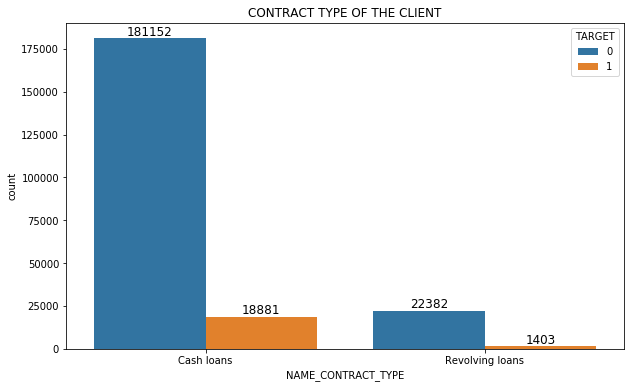

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_app_data,x='NAME_CONTRACT_TYPE',hue='TARGET').set(title='CONTRACT TYPE OF THE CLIENT')
add_labels(plt.gca()) 

Clients with Cash loans are more likely to pay the loan without any difficulties

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


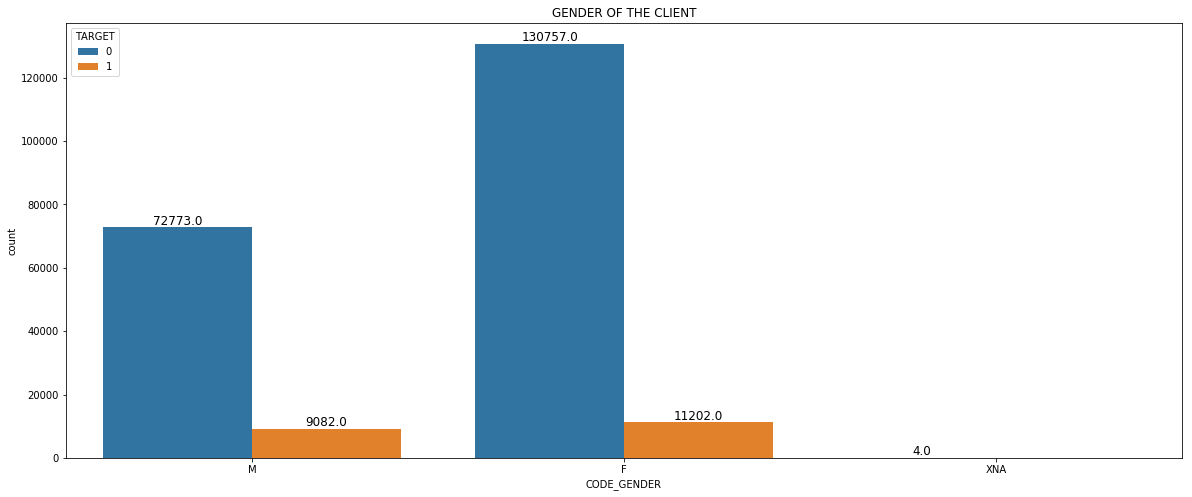

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CODE_GENDER',hue='TARGET').set(title='GENDER OF THE CLIENT')
add_labels(plt.gca()) 

1.Female application are more compared to Male because of low interest rates for females .<br>
2.Also looking at the numbers Females are more likely to default(11202)compared to Male(9082).

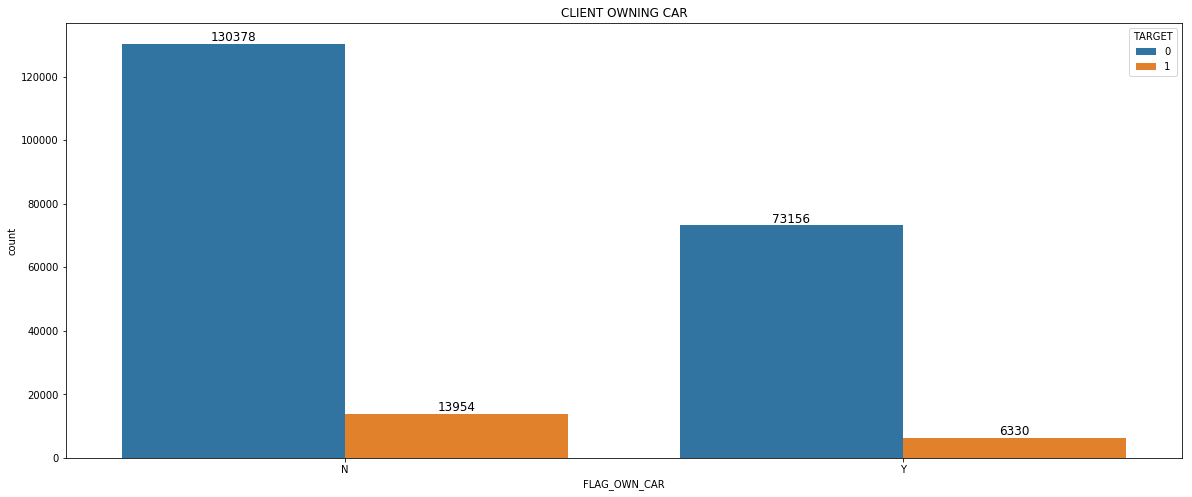

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='FLAG_OWN_CAR',hue='TARGET').set(title='CLIENT OWNING CAR')
add_labels(plt.gca()) 

1. Number of clients who does not own Car are more likely to default(almost more than 50%).However, if we see number of clients who does not default and its number contribution across client who does not own a car is less (less than 50%)compared to clients who own car. 
2. Hence,client who owns Car is less likely to default.
3. It's better to give loan to applicants who owns a Car.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


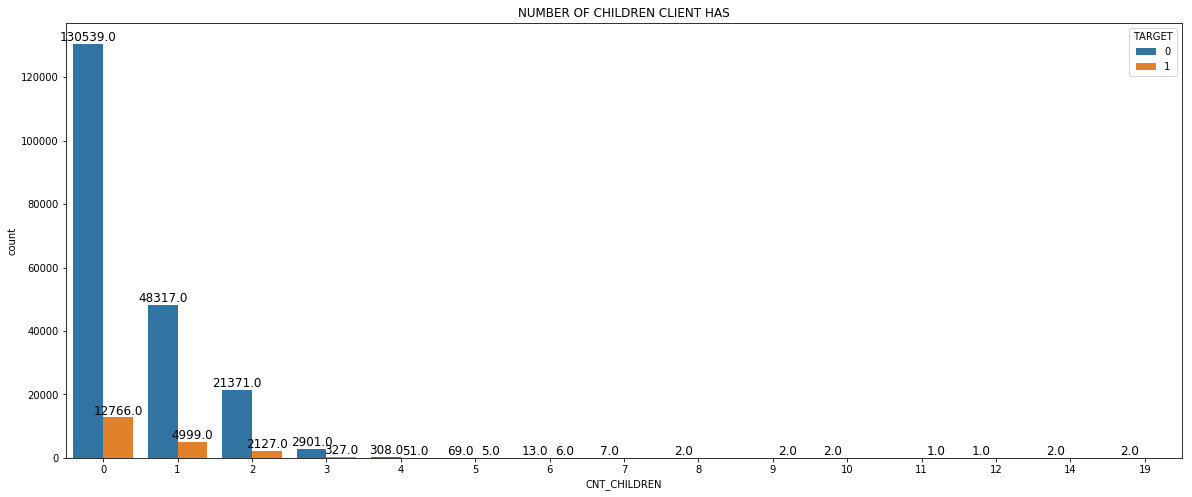

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CNT_CHILDREN',hue='TARGET').set(title='NUMBER OF CHILDREN CLIENT HAS')
add_labels(plt.gca()) 

Clients with no children will pay loan on time and follows a negative trend if number of children increases

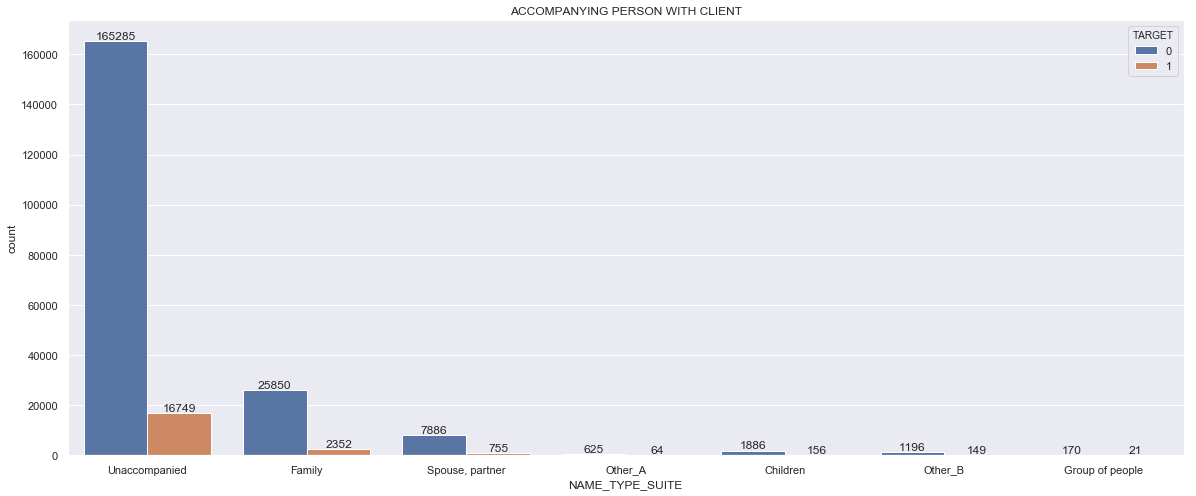

In [64]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_TYPE_SUITE',hue='TARGET').set(title='ACCOMPANYING PERSON WITH CLIENT')
add_labels(plt.gca()) 

Clients come alone more often for loan application

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


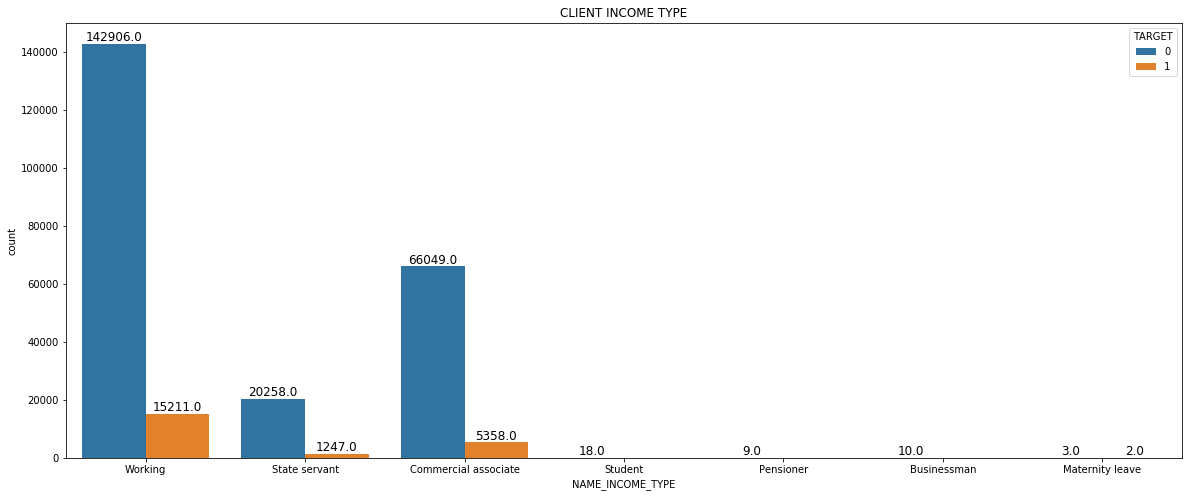

In [229]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_INCOME_TYPE',hue='TARGET').set(title='CLIENT INCOME TYPE')
add_labels(plt.gca()) 
plt.show()

Most of the working people apply for the loan application

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


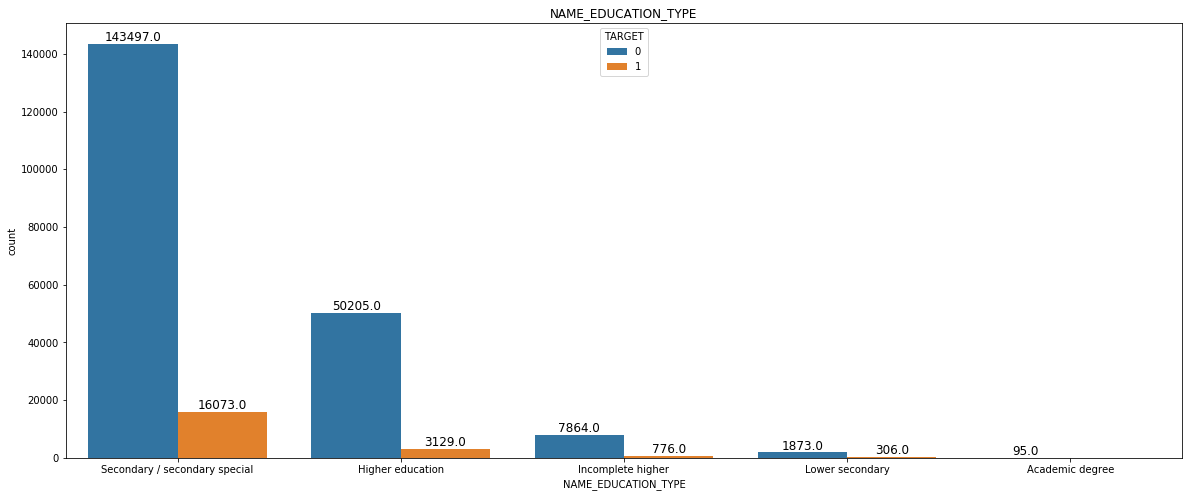

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_EDUCATION_TYPE',hue='TARGET').set(title='NAME_EDUCATION_TYPE')
add_labels(plt.gca()) 

It is more favourable to give loan who had Secondary or Higher education than with lower education

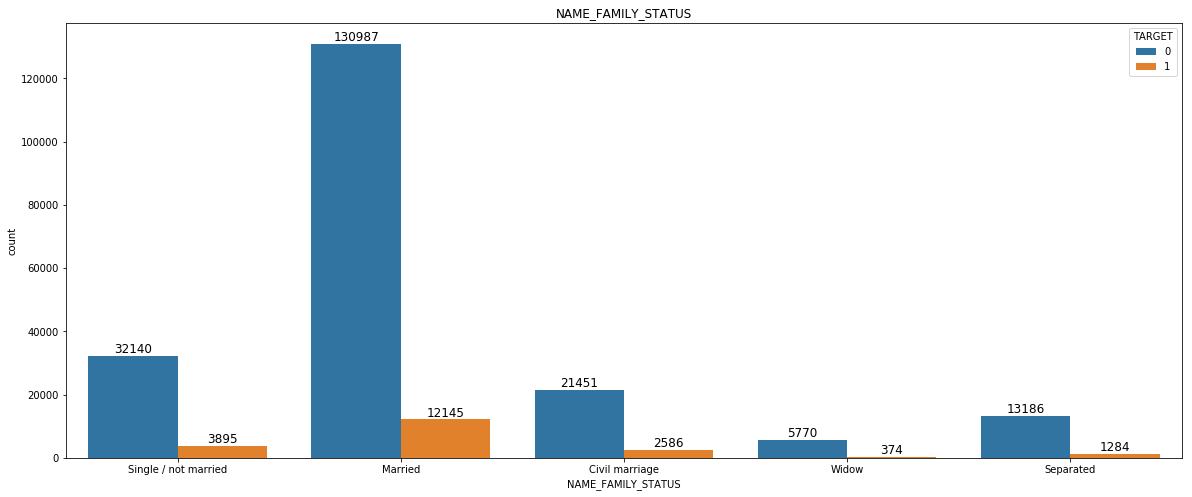

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_FAMILY_STATUS',hue='TARGET').set(title='NAME_FAMILY_STATUS')
add_labels(plt.gca()) 

Married clients tend to have less chance of becoming defaulters

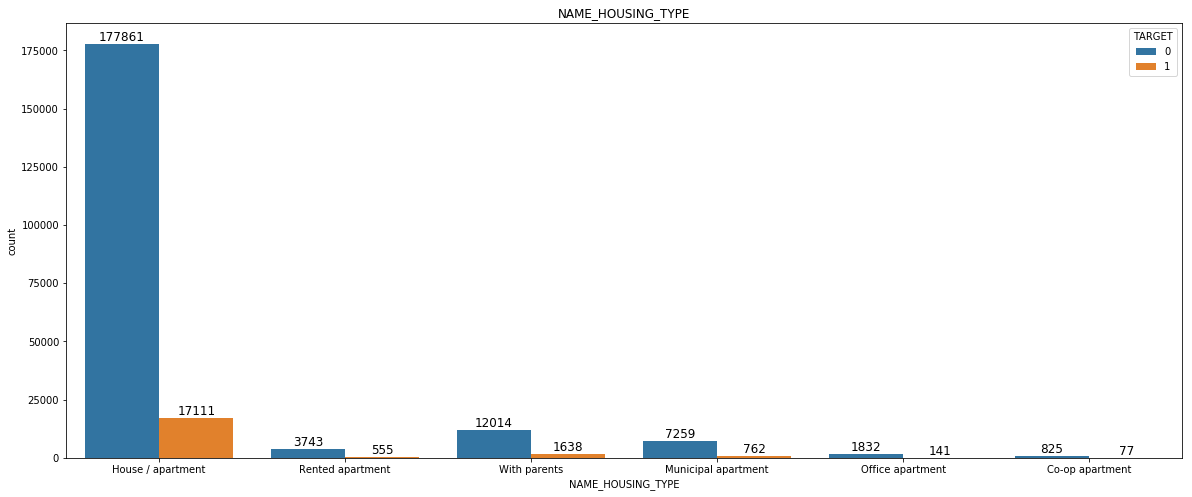

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_HOUSING_TYPE',hue='TARGET').set(title='NAME_HOUSING_TYPE')
add_labels(plt.gca()) 

Clients living in House/Apartment are more likely to pay the loan on time

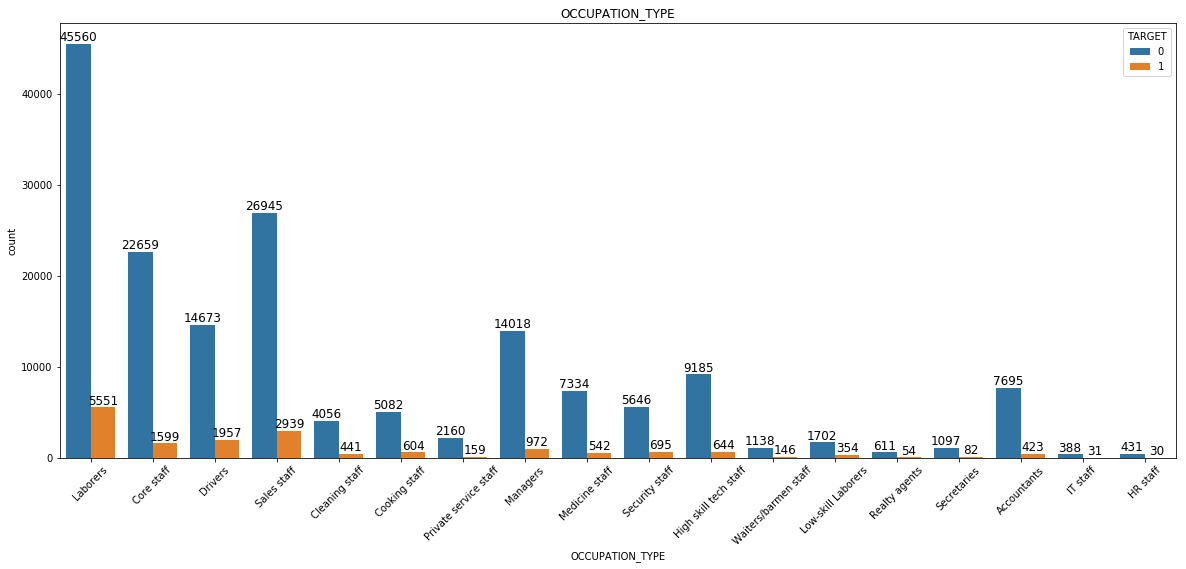

In [45]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df_app_data,x='OCCUPATION_TYPE',hue='TARGET').set(title='OCCUPATION_TYPE')
x=plt.xticks(rotation=45)
add_labels(plt.gca()) 

Laborers, core staff, drivers and sales staff require loan mostly and these occupation people have less chance of becoming defaulters

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


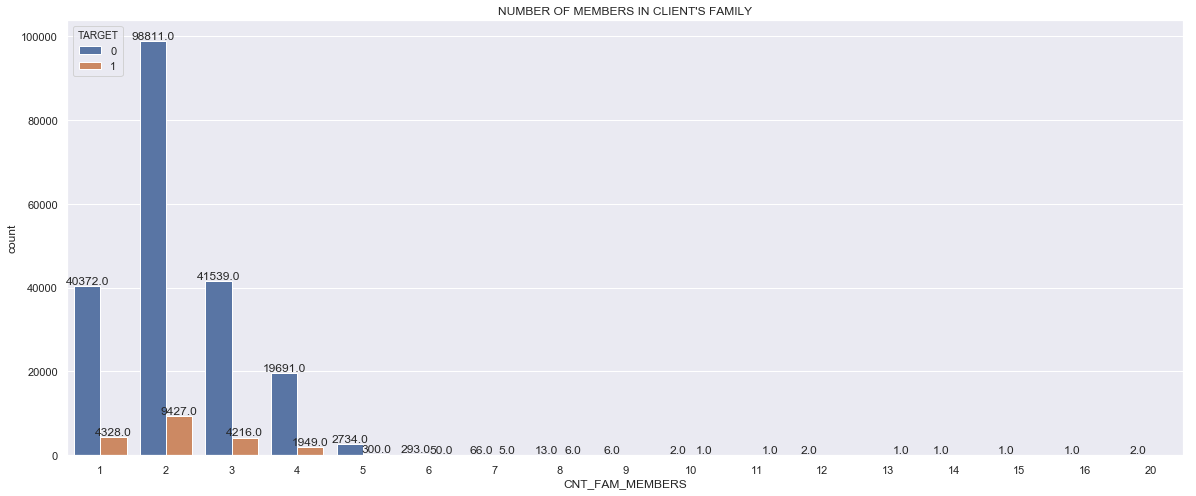

In [65]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CNT_FAM_MEMBERS',hue='TARGET').set(title="NUMBER OF MEMBERS IN CLIENT'S FAMILY")
add_labels(plt.gca()) 

Clients living with two persons most likely require loan and has more than 90% probability of paying loan without any difficulties

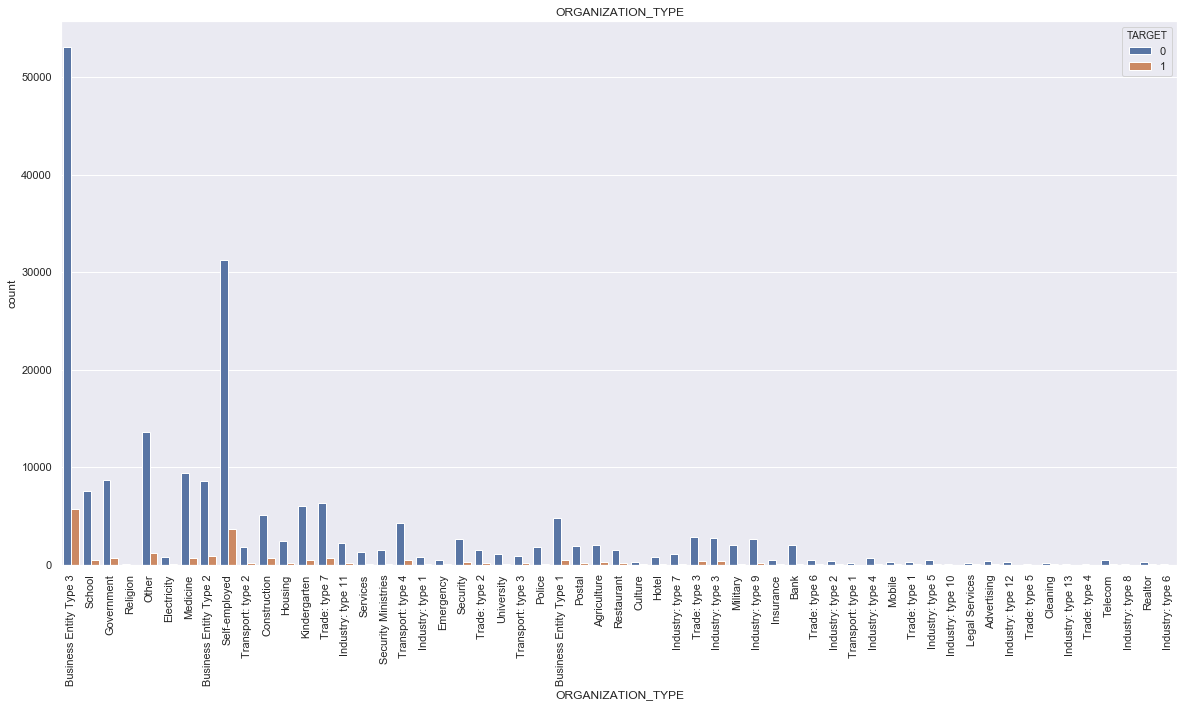

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_app_data,x='ORGANIZATION_TYPE',hue='TARGET').set(title='ORGANIZATION_TYPE')
x=plt.xticks(rotation=90)


Most of the business people and self-employed are more likely to pay every installment in scheduled period

### CORRELATION MATRIX

In [84]:
c=df_target1.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False).drop_duplicates()
corr_target1=pd.DataFrame(so)
corr_target1

0
CNT_FAM_MEMBERS  CNT_FAM_MEMBERS   1.000000
AMT_GOODS_PRICE  AMT_CREDIT        0.977884
CNT_FAM_MEMBERS  CNT_CHILDREN      0.893460
AMT_CREDIT       AMT_ANNUITY       0.740558
AMT_ANNUITY      AMT_GOODS_PRICE   0.738456
                 AMT_INCOME_TOTAL  0.374433
AMT_INCOME_TOTAL AMT_GOODS_PRICE   0.305387
AGE              YEARS_WRK_EXP     0.305153
AMT_CREDIT       AMT_INCOME_TOTAL  0.303204
AGE              AMT_CREDIT        0.188637
                 AMT_GOODS_PRICE   0.184819
AMT_GOODS_PRICE  YEARS_WRK_EXP     0.120078
AMT_CREDIT       YEARS_WRK_EXP     0.113132
AGE              AMT_INCOME_TOTAL  0.087834
                 AMT_ANNUITY       0.081628
CNT_FAM_MEMBERS  AMT_ANNUITY       0.060927
AMT_CREDIT       CNT_FAM_MEMBERS   0.056359
AMT_GOODS_PRICE  CNT_FAM_MEMBERS   0.053328
AMT_ANNUITY      YEARS_WRK_EXP     0.049832
YEARS_WRK_EXP    AMT_INCOME_TOTAL  0.030258
AMT_ANNUITY      CNT_CHILDREN      0.021207
CNT_CHILDREN     AMT_CREDIT        0.006071
YEARS_WRK_EXP    CNT_FAM_MEMBERS   0.002823
CNT_CHILDREN     AMT_GOODS_PRICE  -0.000113
CNT_FAM_MEMBERS  AMT_INCOME_TOTAL -0.029531
YEARS_WRK_EXP    CNT_CHILDREN     -0.029827
AMT_INCOME_TOTAL CNT_CHILDREN     -0.034594
CNT_FAM_MEMBERS  AGE              -0.108569
AGE              CNT_CHILDREN     -0.173281

In [83]:
c=df_target0.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False).drop_duplicates()
corr_target0=pd.DataFrame(so)
corr_target0

0
CNT_FAM_MEMBERS  CNT_FAM_MEMBERS   1.000000
AMT_GOODS_PRICE  AMT_CREDIT        0.981310
CNT_FAM_MEMBERS  CNT_CHILDREN      0.892272
AMT_ANNUITY      AMT_CREDIT        0.753513
AMT_GOODS_PRICE  AMT_ANNUITY       0.751926
AMT_ANNUITY      AMT_INCOME_TOTAL  0.387304
AGE              YEARS_WRK_EXP     0.340199
AMT_INCOME_TOTAL AMT_GOODS_PRICE   0.314019
AMT_CREDIT       AMT_INCOME_TOTAL  0.310507
                 AGE               0.154266
AGE              AMT_GOODS_PRICE   0.149651
AMT_GOODS_PRICE  YEARS_WRK_EXP     0.085037
YEARS_WRK_EXP    AMT_CREDIT        0.083187
AMT_ANNUITY      AGE               0.081655
CNT_FAM_MEMBERS  AMT_ANNUITY       0.043024
AMT_ANNUITY      YEARS_WRK_EXP     0.040086
AGE              AMT_INCOME_TOTAL  0.038565
AMT_CREDIT       CNT_FAM_MEMBERS   0.036700
AMT_GOODS_PRICE  CNT_FAM_MEMBERS   0.034874
AMT_INCOME_TOTAL YEARS_WRK_EXP     0.025853
AMT_ANNUITY      CNT_CHILDREN     -0.005063
CNT_CHILDREN     AMT_CREDIT       -0.016013
AMT_GOODS_PRICE  CNT_CHILDREN     -0.020586
CNT_FAM_MEMBERS  AMT_INCOME_TOTAL -0.022423
YEARS_WRK_EXP    CNT_FAM_MEMBERS  -0.023958
AMT_INCOME_TOTAL CNT_CHILDREN     -0.025170
CNT_CHILDREN     YEARS_WRK_EXP    -0.056096
CNT_FAM_MEMBERS  AGE              -0.174539
CNT_CHILDREN     AGE              -0.238530

From the above two tables, we can infer that:

- For both the targets 0 and 1, the top five correlation pairs follow the same rank in both the cases
- All the amounts are highly correlated to each other.
- Goods price and Credit Amount is very highly correlated with 0.98, most applicants are getting the loan approved with the same amount as required for applicant and there is very less chances of reduction in the amount approved
- It's highly obvious about the family members and number of children with 0.89 correlation
- Also Annuity amount has same correlation with Credit Amount and Goods price amount

### Continuous Variables

In [50]:
def univariate_analysis(df, col):
    sns.set(style='darkgrid')
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=col, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col]).set(title='Dist Plot')
    
    plt.subplot(1, 3, 3)
    sns.violinplot(data =df, x=col, inner='quartile').set(title='Violin Plot')    
    


#### INCOME AMOUNT OF THE CLIENT

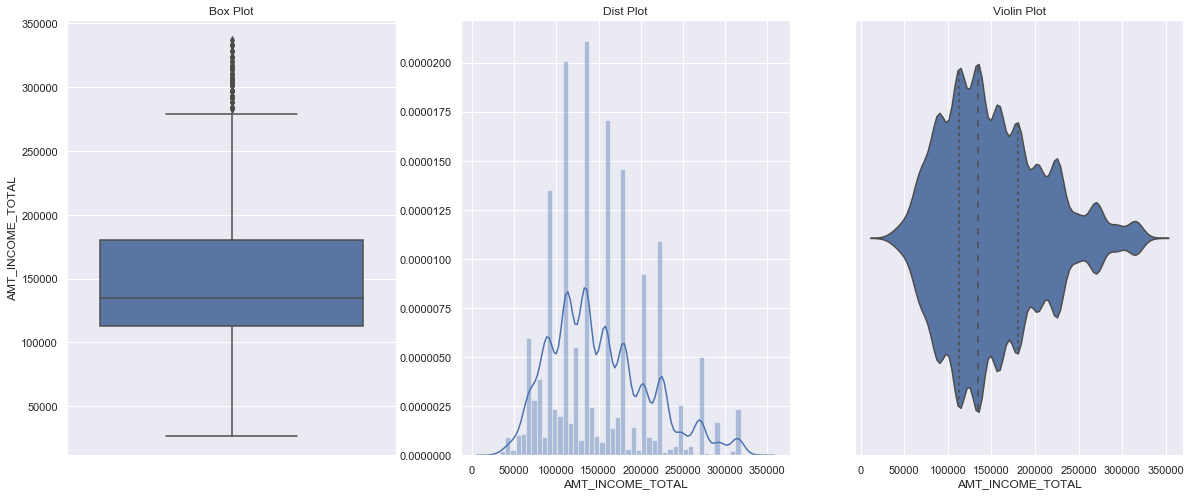

In [51]:
#Plotting for clients with defaults
univariate_analysis(df=df_target1,col='AMT_INCOME_TOTAL')

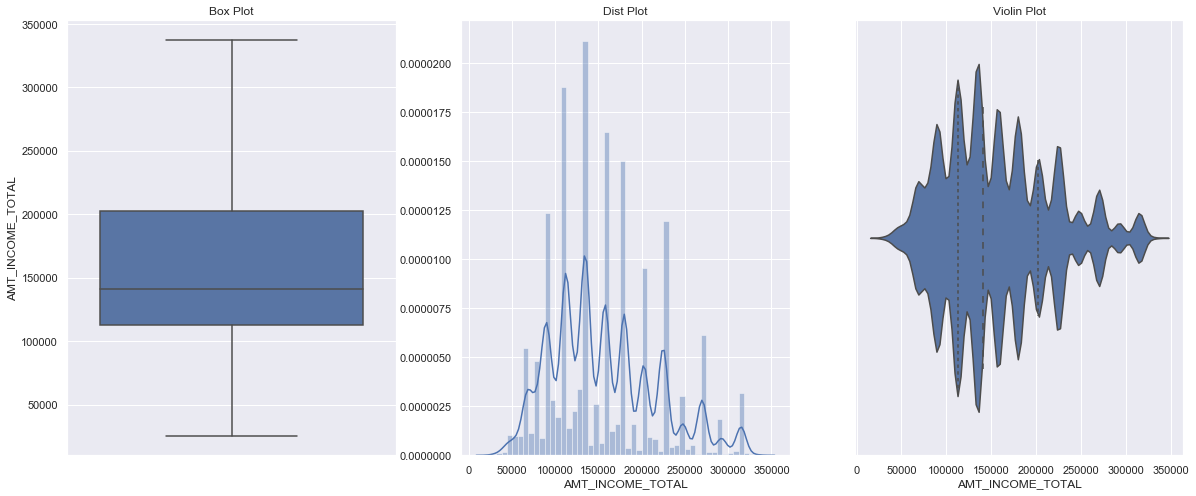

In [52]:
#Plotting for non-defaulter clients
univariate_analysis(df=df_target0,col='AMT_INCOME_TOTAL')

- Clients income is spread equally in both the target cases but from the box plots, one difference is that most of the non-defaulters clients have income more than the median income.
- This tells us that clients with income between 150000-200000 may be beneficial for getting non-defaulters clients
- Clients with income between 100000-150000 are most likely to become defaulters

#### CREDIT AMOUNT OF THE LOAN

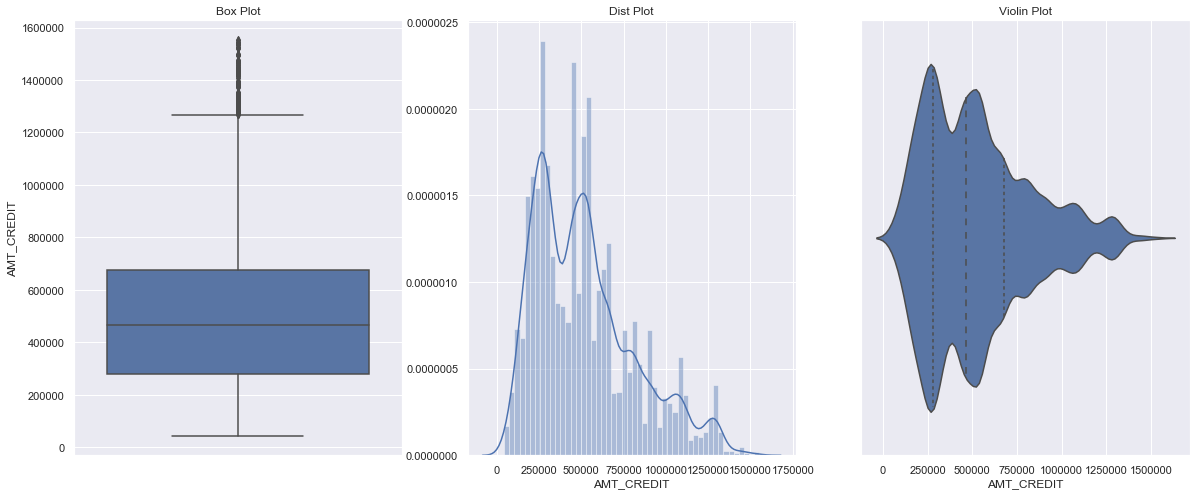

In [53]:
univariate_analysis(df=df_target1,col='AMT_CREDIT')

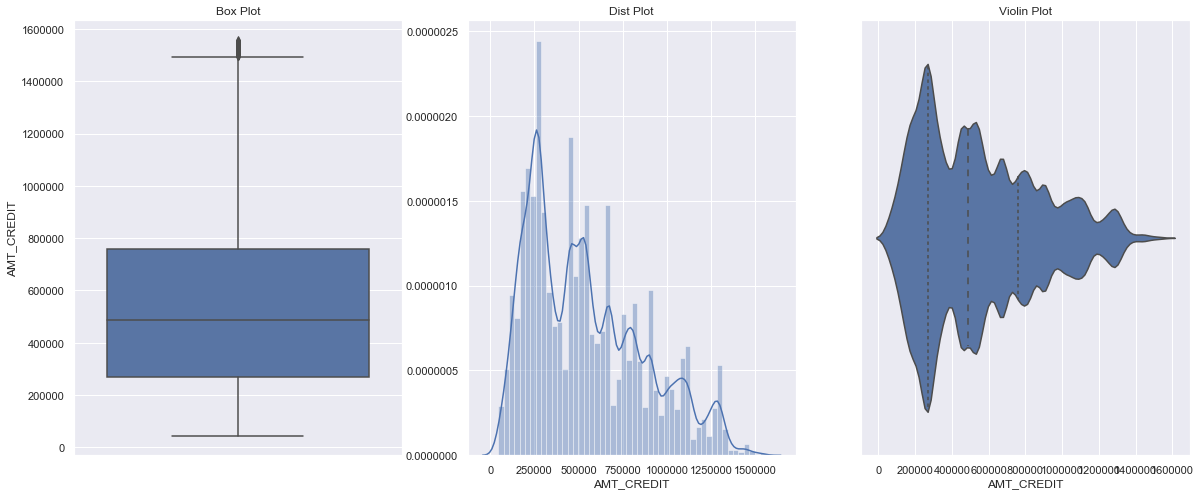

In [54]:
univariate_analysis(df=df_target0,col='AMT_CREDIT')

- Most clients gets 250000 loan amount approved in both the cases
- Clients with loan credit between 250000-500000 have more chances to become defaulters

#### ANNUITY AMOUNT FOR THE CLIENT

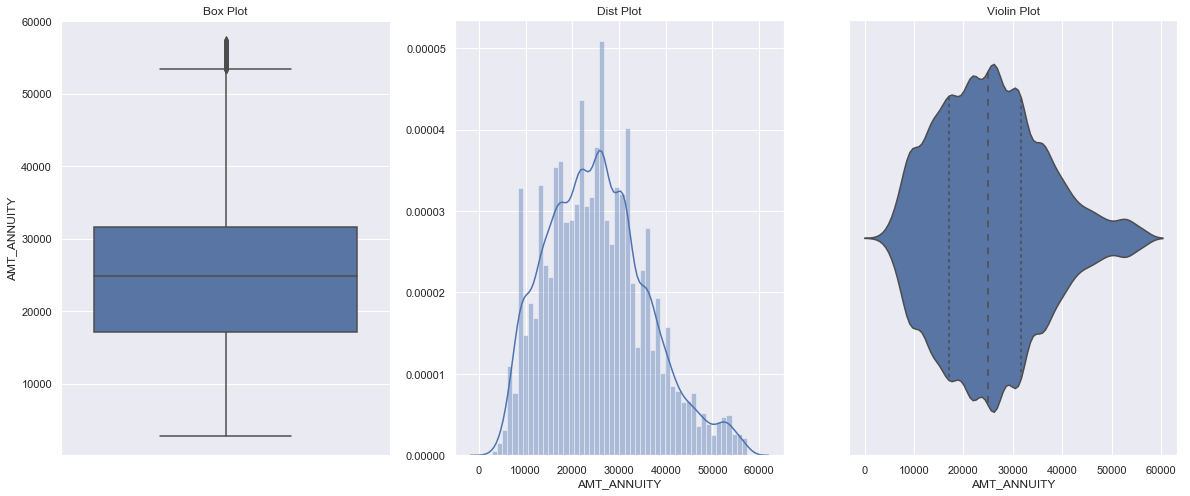

In [55]:
univariate_analysis(df=df_target1,col='AMT_ANNUITY')

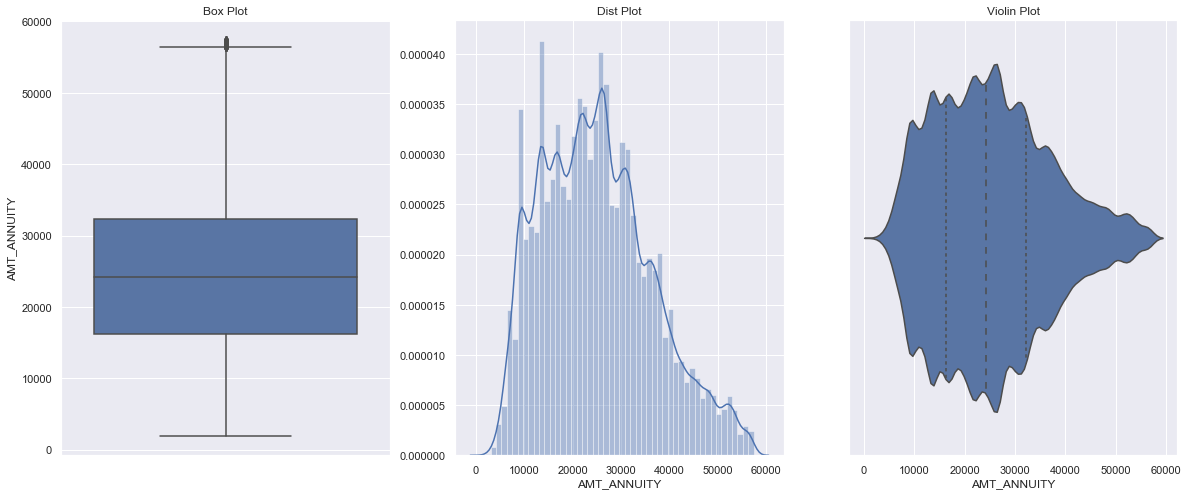

In [56]:
univariate_analysis(df=df_target0,col='AMT_ANNUITY')

- Annuity amount shows normally distributed pattern in both the cases
- Mostly client gets 15000-30000 as annuity amount for the loan

#### GOODS PRICE FOR THE LOAN

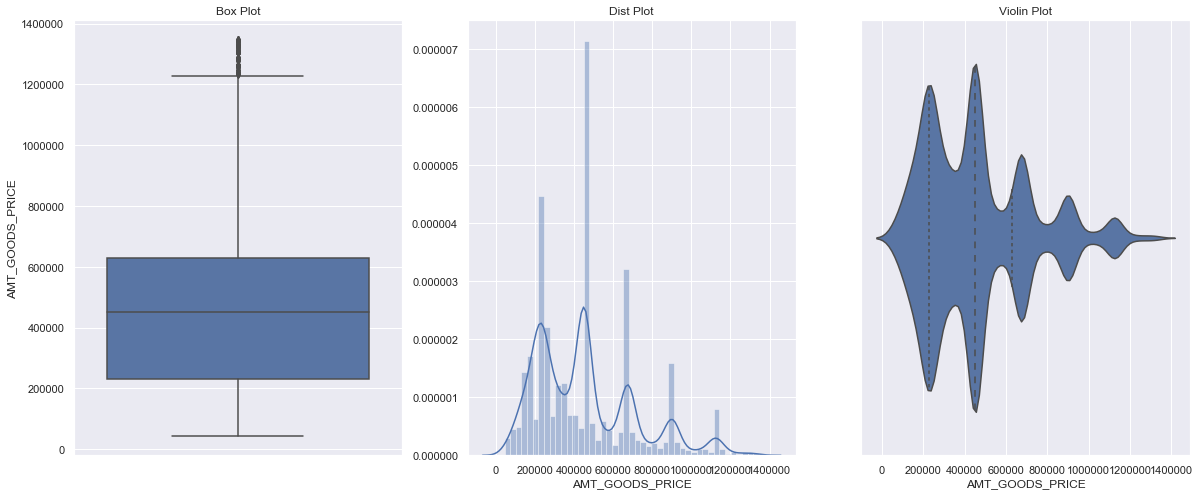

In [57]:
univariate_analysis(df=df_target1,col='AMT_GOODS_PRICE')

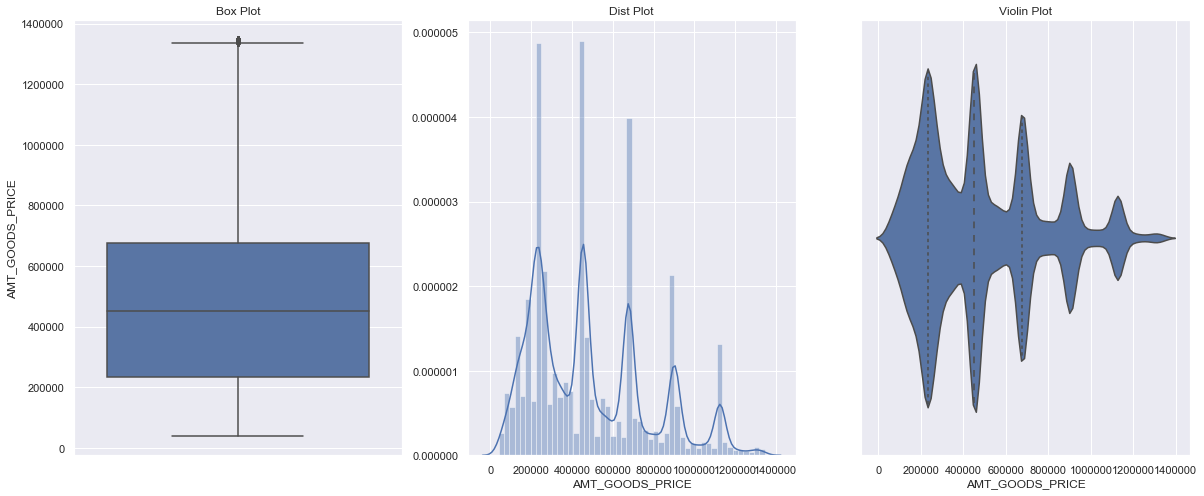

In [58]:
univariate_analysis(df=df_target0,col='AMT_GOODS_PRICE')

- Maximum defaulters lie betweeen goods price amount of 225000-425000
- There are specific amounts where clients have proven to be non-defaulters such as 200000,425000 and 650000. Clients with these goods price may belong to the same category and are non-defaulters

#### CLIENT'S AGE

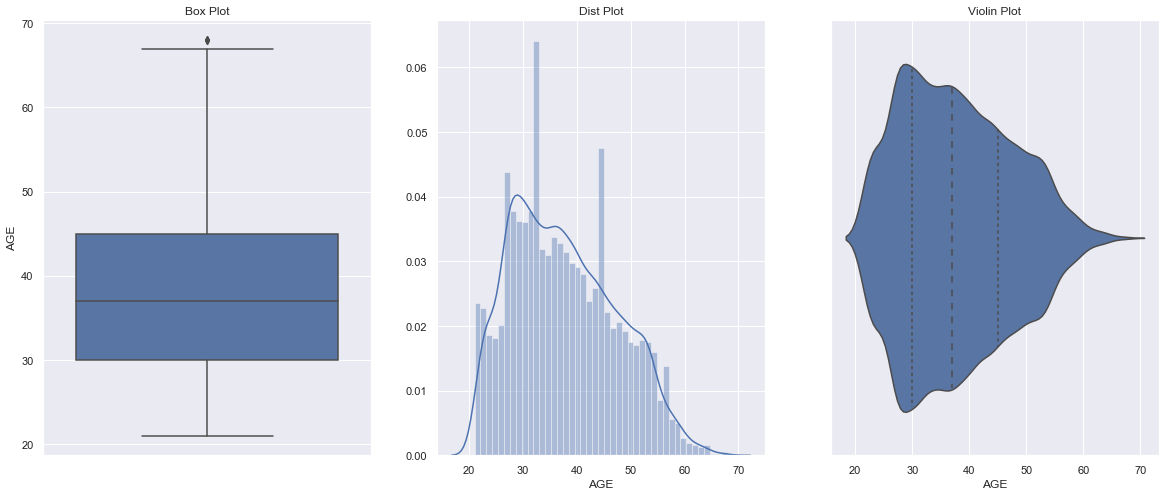

In [59]:
univariate_analysis(df=df_target1,col='AGE')

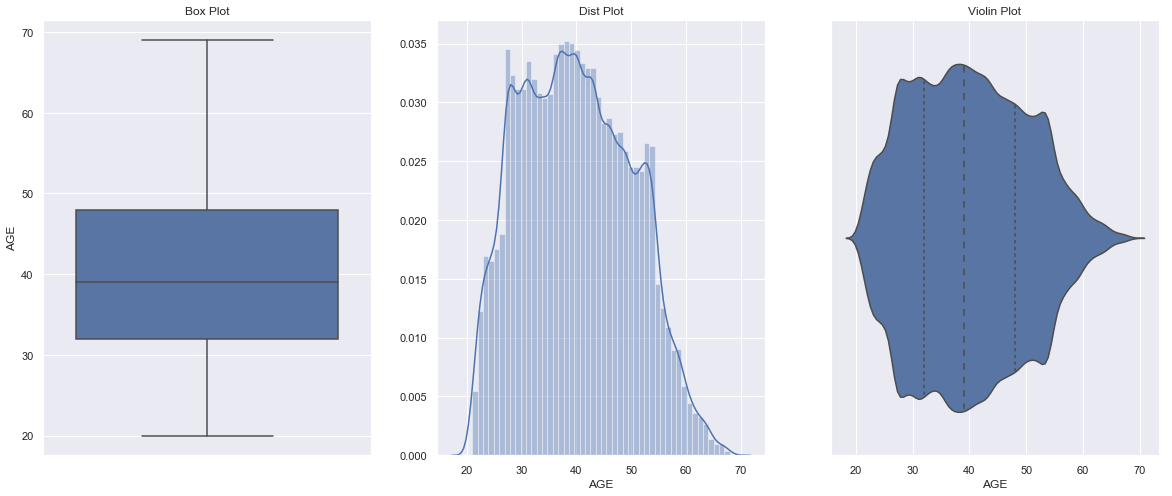

In [60]:
univariate_analysis(df=df_target0,col='AGE')

- Many clients with age 32 and 45 years are defaulters.
- Client's age show a normal trend such that clients with every age category reqquires loan.
- But clients with age between 30-40 can pay the loan without any difficulties.

#### CLIENT'S WORK EXPERIENCE

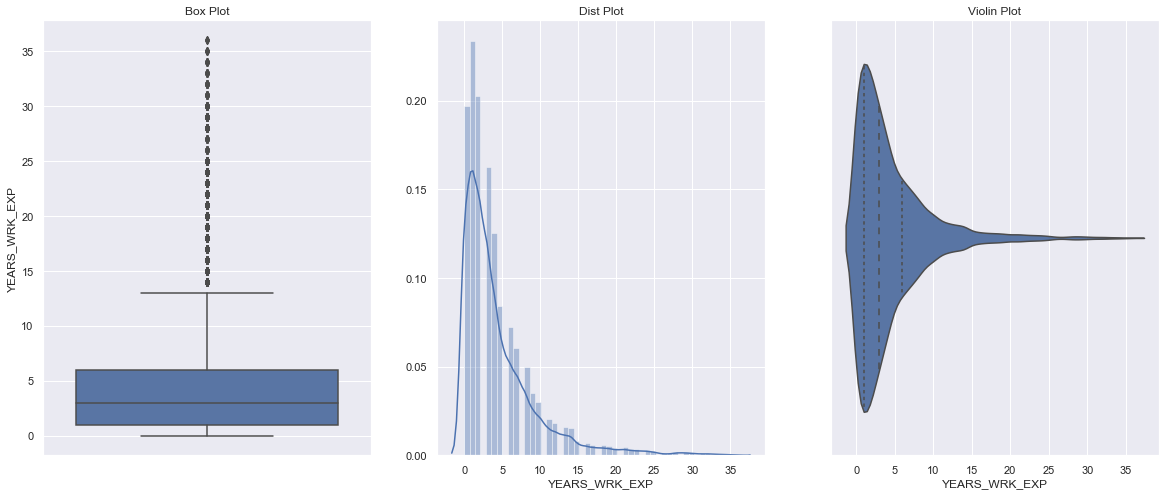

In [61]:
univariate_analysis(df=df_target1,col='YEARS_WRK_EXP')

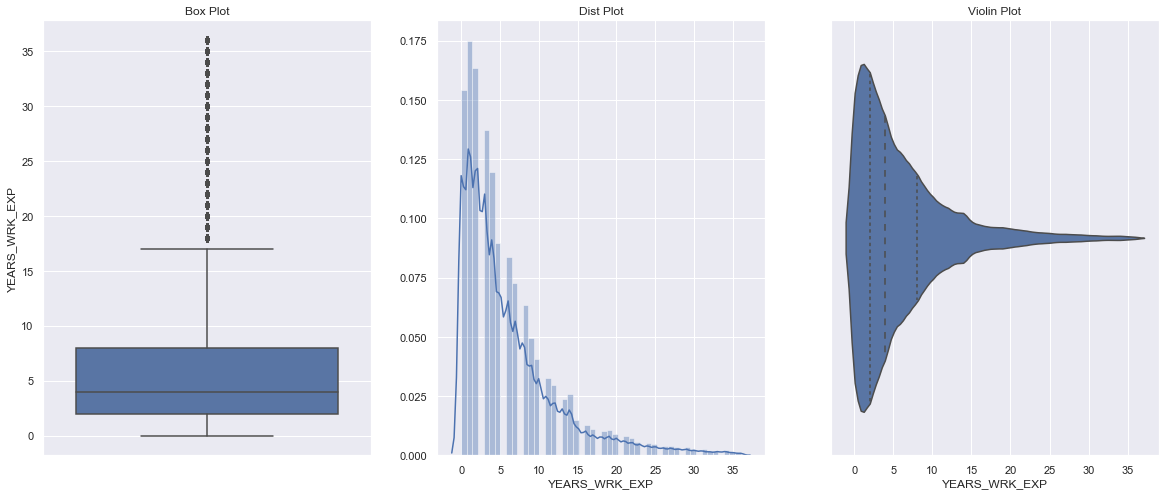

In [62]:
univariate_analysis(df=df_target0,col='YEARS_WRK_EXP')

- Most applications are from clients with 2 years of experience in both the cases
- Work experience has negative trend with the increase years of experience.
- Bank should focus more on clients with 2 years of experience to increase their business.

## Bivariate Analysis 

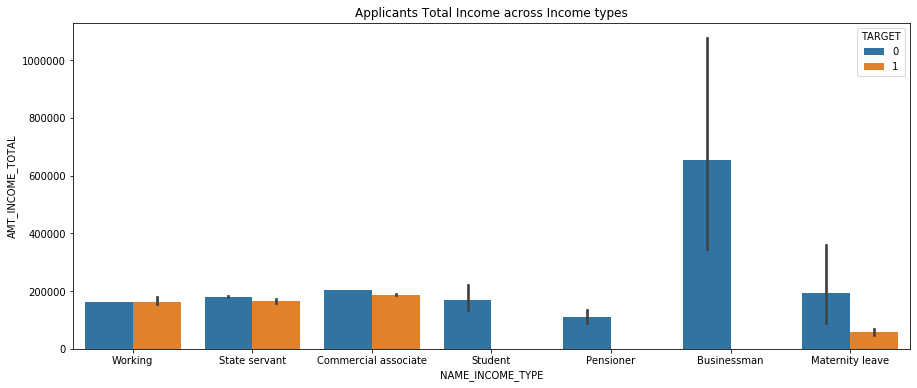

In [234]:
#1. Numerical vs Categorical

# AMT_INCOME_TOTAL vs AMT_INCOME_TYPE
# will see how is the Income for various category and its distribution across defaulters and non defaulters group

plt.figure(figsize=(15,6))
sns.barplot(data=df_app_data,x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title("Applicants Total Income across Income types")
plt.show()

From the above plot we can infer below points:
1. Stuuldents/Pensioners/Businessman are absolute non defaulters.<br>
2. Females who are on maternity leaves are less likely to default.<br>
3. For rest of the income type categories, bank should verify as chances of default souly depends on situation as most of the defaulters are from working,state servant or commercial associats


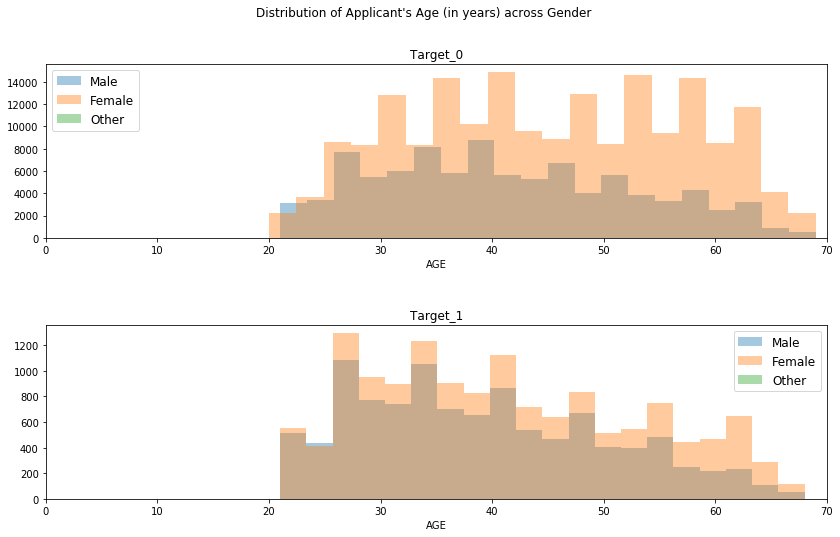

In [41]:
#2. Categorical vs Categorical

# AGE vs CODE_GENDER

#1. Distribution of Applicant's Age in years across Gender
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Distribution of Applicant's Age (in years) across Gender")

plt.subplot(2,1,1)

df = df_target0[df_target0.CODE_GENDER == "M"]
sns.distplot(df['AGE'],kde=False, label='Male',bins = 20)
df = df_target0[df_target0.CODE_GENDER == "F"]
sns.distplot(df['AGE'],kde=False, label='Female',bins = 20)
df = df_target0[df_target0.CODE_GENDER == "XNA"]
sns.distplot(df['AGE'],kde=False, label='Other',bins = 20)
plt.xticks(np.arange(0,80,10))
plt.gca().set_title("Target_0")
plt.legend(prop={'size': 12})

plt.subplot(2,1,2)

df = df_target1[df_target1.CODE_GENDER == "M"]
sns.distplot(df['AGE'],kde=False, label='Male',bins = 20)
df = df_target1[df_target1.CODE_GENDER == "F"]
sns.distplot(df['AGE'],kde=False, label='Female',bins = 20)
df = df_target1[df_target1.CODE_GENDER == "XNA"]
sns.distplot(df['AGE'],kde=False, label='Other',bins = 20)
plt.xticks(np.arange(0,80,10))
plt.gca().set_title("Target_1")
plt.legend(prop={'size': 12})

plt.show()

1.Clients in early 20s are likely to dont have payment difficulties,specially Females applicants.They are might be students(at the age of 21 or 22) just done with graduation and may have applied education loan for Masters.<br>
2.Most number of defaults can be found under age group 25 to 40 yrs.


In [42]:
#3. Numerical vs Numerical

#Considering all numerical columns

#1. Find numerical columns for Target 1
df1 = df_target1.select_dtypes(include = ['float64','int64','int32'])
df1.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.001160,-0.005166,-0.003816
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.259222,-0.192866,0.885484
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037583,-0.003154,-0.014979,0.006654
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.983103,0.135070,0.001936,0.051224
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752699,0.014028,-0.081213,0.075711
AMT_GOODS_PRICE,-0.001816,-0.008112,0.037583,0.983103,0.752699,1.000000,0.135603,0.006644,0.047388
AGE,0.001160,-0.259222,-0.003154,0.135070,0.014028,0.135603,1.000000,0.582443,-0.203403
YEARS_WRK_EXP,-0.005166,-0.192866,-0.014979,0.001936,-0.081213,0.006644,0.582443,1.000000,-0.186516
CNT_FAM_MEMBERS,-0.003816,0.885484,0.006654,0.051224,0.075711,0.047388,-0.203403,-0.186516,1.000000


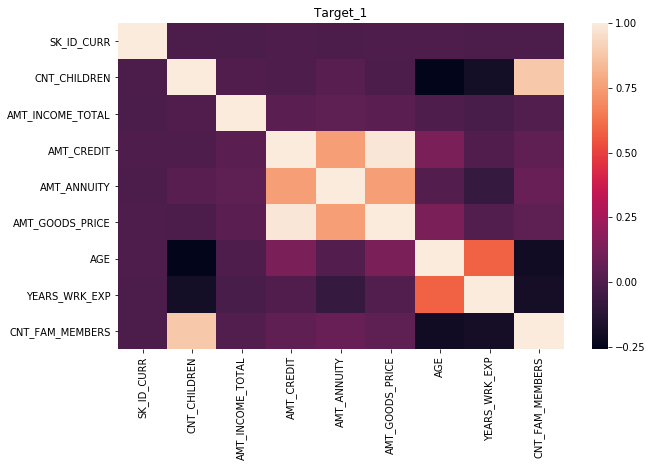

In [235]:
# Graphical representation for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr())
plt.title("Target_1")
plt.show()

#### From above correlation graphs below are the observation:<br>
1.AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE are highly correlated in the range of 0.7 to 0.9.<br>
2.Age and years of experience are nicely correlated to each other which with corr value 0.582443.<br>
3.Its strange that applicants Total Income having low correlation with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE.Needless to say, applicants having difficulties in payments <br>
4.Count of Children for the applicant is highly correlated with count of family members. obvious!

In [49]:
#1. Find numerical columns for Target 0
df0 = df_target0.select_dtypes(include = ['float64','int64','int32'])
df0.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.001318,0.001742,-0.002790
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.336907,-0.245173,0.878571
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418953,0.349462,-0.062494,-0.140394,0.034256
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771309,0.987250,0.047366,-0.070105,0.064536
AMT_ANNUITY,0.000068,0.020905,0.418953,0.771309,1.000000,0.776686,-0.012254,-0.104983,0.075787
AMT_GOODS_PRICE,-0.000205,-0.000525,0.349462,0.987250,0.776686,1.000000,0.044552,-0.068609,0.062814
AGE,0.001318,-0.336907,-0.062494,0.047366,-0.012254,0.044552,1.000000,0.626028,-0.285806
YEARS_WRK_EXP,0.001742,-0.245173,-0.140394,-0.070105,-0.104983,-0.068609,0.626028,1.000000,-0.238301
CNT_FAM_MEMBERS,-0.002790,0.878571,0.034256,0.064536,0.075787,0.062814,-0.285806,-0.238301,1.000000


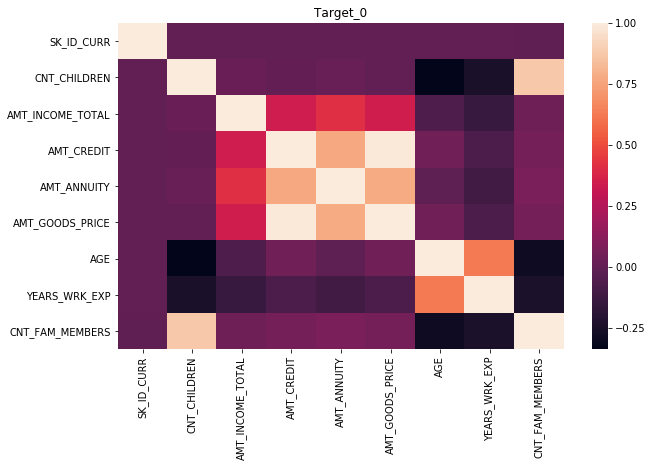

In [236]:
# Graphical representation for correlation

plt.figure(figsize=(10,6))
sns.heatmap(df0.corr())
plt.title("Target_0")
plt.show()

### From above correlation graphs below are the observation:<br>
1.AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE are highly correlated in the range of 0.7 to 0.9.<br>
2.Age and years of experience are nicely correlated to each other which with corr value 0.62.<br>
3.Applicants Total Income having MODERATE correlation with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE , having highest with AMT_INCOME_TOTAL,which is a good sign. Applicants fall under group who do not have payment difficulties !! <br>
4.Count of Children for the applicant is highly correlated with count of family members. obvious!

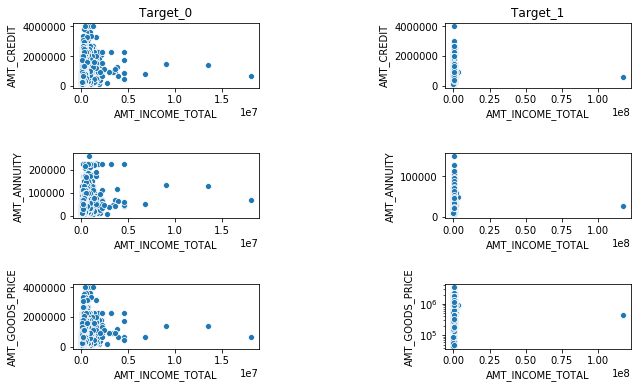

In [54]:
#lets see distribution of highly correlated fields look like

#1.AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE against AMT_INCOME_TOTAL

plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=1, wspace=1)
plt.subplot(3,2,1)
plt.gca().set_title("Target_0")
sns.scatterplot(x = df_target0['AMT_INCOME_TOTAL'],y = df_target0['AMT_CREDIT'])
#plt.xticks(np.arange(0,1,0.2))
plt.subplot(3,2,2)
plt.gca().set_title("Target_1")
sns.scatterplot(x = df_target1['AMT_INCOME_TOTAL'],y = df_target1['AMT_CREDIT'])
plt.subplot(3,2,3)
sns.scatterplot(x = df_target0['AMT_INCOME_TOTAL'],y = df_target0['AMT_ANNUITY'])
#plt.xticks(np.arange(0,1,0.2))
plt.subplot(3,2,4)
sns.scatterplot(x = df_target1['AMT_INCOME_TOTAL'],y = df_target1['AMT_ANNUITY'])
plt.subplot(3,2,5)
sns.scatterplot(x = df_target0['AMT_INCOME_TOTAL'],y = df_target0['AMT_GOODS_PRICE'])
#plt.xticks(np.arange(0,1,0.2))
plt.subplot(3,2,6)
sns.scatterplot(x = df_target1['AMT_INCOME_TOTAL'],y = df_target1['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()

Client who have less income but higher Credit amount/Annuity amount/goods price are more likely to default.

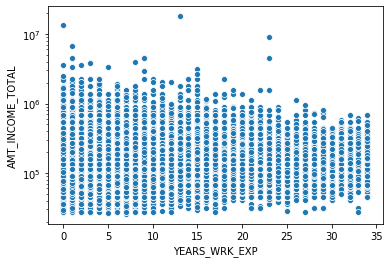

In [70]:
#2. Income vs work experience

#Target_0

sns.scatterplot(y = df_target0['AMT_INCOME_TOTAL'],x = df_target0['YEARS_WRK_EXP'])
plt.yscale('log')

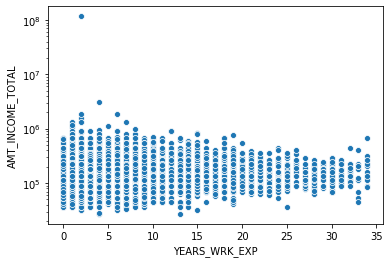

In [71]:
#Target_1
sns.scatterplot(y = df_target1['AMT_INCOME_TOTAL'],x = df_target1['YEARS_WRK_EXP'])
plt.yscale('log')

#### Points for Target = 1 graph compared to Target = 0
Less work experience and more the income are more likely to default

### Analysis for Previous Application Data

In [72]:
#load prev data file 

df_prev_data = pd.read_csv(previous_application_path)
df_prev_data.shape

(1048575, 15)

In [73]:
df_prev_data.describe(include = 'all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY
count,1048575.000000,1048575.000000,1048575,815566.000000,1048575.000000,1048575.000000,807610.000000,1048575,1048575,1048575,1048575.000000,1048575,1048575,1048575,1048575
unique,nan,nan,4,nan,nan,nan,nan,2,25,4,nan,4,9,4,28
top,nan,nan,Cash loans,nan,nan,nan,nan,Y,XAP,Approved,nan,Cash through the bank,XAP,Repeater,XNA
freq,nan,nan,465861,nan,nan,nan,nan,1043203,582714,652486,nan,650604,849712,771957,593690
mean,1922775.382023,278436.746171,NaN,15891.265151,174269.769421,195000.011725,226289.224961,NaN,NaN,NaN,-882.038059,NaN,NaN,NaN,NaN
std,532936.569351,102856.889989,NaN,14745.557438,291078.872393,316940.670675,313448.956632,NaN,NaN,NaN,779.264887,NaN,NaN,NaN,NaN
min,1000001.000000,100001.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-2922.000000,NaN,NaN,NaN,NaN
25%,1460641.500000,189386.000000,NaN,6301.350000,18900.000000,24277.500000,50580.000000,NaN,NaN,NaN,-1303.000000,NaN,NaN,NaN,NaN
50%,1923419.000000,278810.000000,NaN,11250.000000,70816.500000,80253.000000,111511.575000,NaN,NaN,NaN,-583.000000,NaN,NaN,NaN,NaN
75%,2384447.500000,367744.500000,NaN,20523.003750,180000.000000,215239.500000,229500.000000,NaN,NaN,NaN,-281.000000,NaN,NaN,NaN,NaN


In [74]:
df_prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,Y,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,Y,XNA,Approved,-164,XNA,XAP,Repeater,XNA
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,112500.000000,Y,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,450000.000000,Y,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,337500.000000,Y,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA


In [81]:
# Select only relevent columns from previous application data
df_prev_data = df_prev_data[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY']]

In [82]:
# change data type 
df_prev_data['SK_ID_CURR'] = df_prev_data['SK_ID_CURR'].astype('str')
df_prev_data['SK_ID_PREV'] = df_prev_data['SK_ID_PREV'].astype('str')
df_prev_data.dtypes

SK_ID_PREV                      object
SK_ID_CURR                      object
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
FLAG_LAST_APPL_PER_CONTRACT     object
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
dtype: object

In [90]:
#merge the current application and prev application data on column SK_ID_CURR

master_df = pd.merge(df_app_data, df_prev_data, on='SK_ID_CURR', how='left')
master_df.shape

(749685, 35)

In [91]:
master_df.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE_x            object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT_x                   float64
AMT_ANNUITY_x                  float64
AMT_GOODS_PRICE_x              float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
AGE                              int32
YEARS_WRK_EXP                    int32
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
ORGANIZATION_TYPE               object
SK_ID_PREV                      object
NAME_CONTRACT_TYPE_y            object
AMT_ANNUITY_y                  float64
AMT_APPLICATION                float64
AMT_CREDIT_y             

In [92]:
#Days decision shoul be positive, handle negative sign

master_df['DAYS_DECISION'] = abs(master_df['DAYS_DECISION'])

In [93]:
#Divide master data (Current application and their information of previous applications) into Target 0 and 1
#1 = Applicants having payment difficulties in current application
#0 = other cases in current application

master_df_t1 = master_df[master_df['TARGET']== '1']
master_df_t0 = master_df[master_df['TARGET']== '0']

print(master_df_t1.shape)
print('\n')
print(master_df_t0.shape)



(69539, 35)


(680146, 35)


Note : Current applicants can have multiple previous application, hence many rows got associated with single current application and total number of rows in marster data after merging has incresed

### Univariate analysis

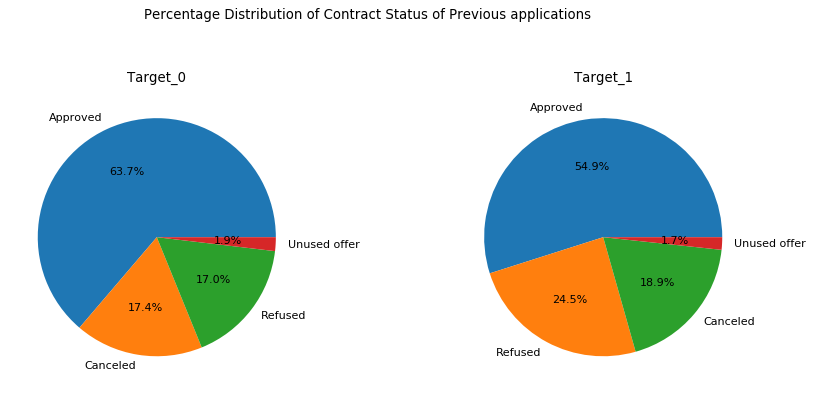

In [95]:
#1. NAME_CONTRACT_STATUS 

#Overall % contribution of each previous application's status for rows associated with Target category 1 or 0
# Target 1(curr app have payment diffifulty) or 0 (other cases)

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
master_df_t0['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
master_df_t1['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Contract Status of Previous applications")
plt.show()

From above graph : % of refused previous application are more for Target = 1 (24.0%) compared to that of Target 0 (16.7%)
It looks like applicants with status of previous applications = Refused are more likely to have difficulties in payments.

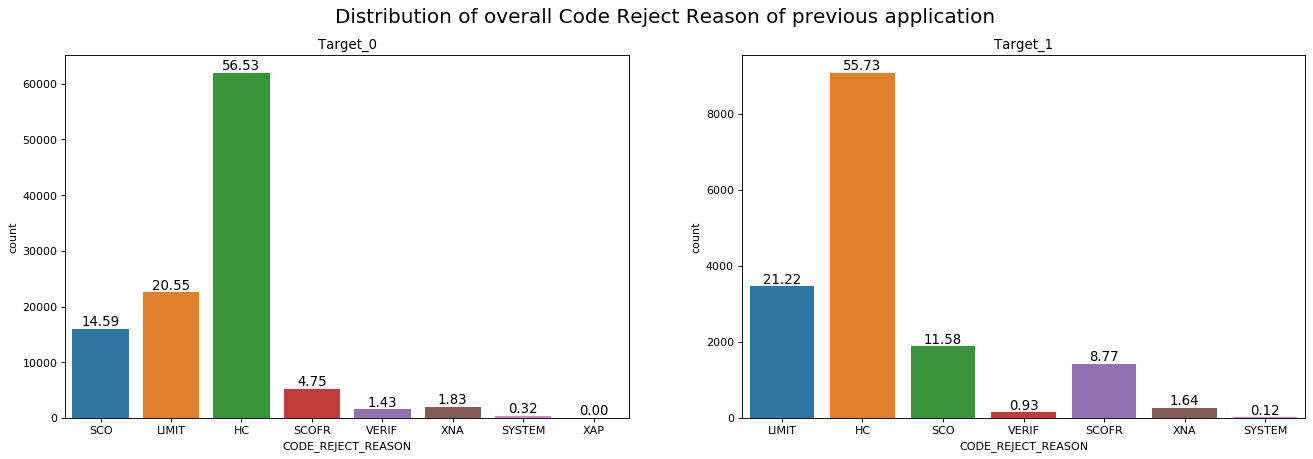

In [155]:
# 2. CODE_REJECT_REASON

temp1= master_df_t1[master_df_t1['NAME_CONTRACT_STATUS']=="Refused"]
temp0= master_df_t0[master_df_t0['NAME_CONTRACT_STATUS']=="Refused"]
def add_labels_per(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), fontsize=12, ha='center', va='bottom')
                
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
sns.countplot(x='CODE_REJECT_REASON',data = temp0)
add_labels_per(plt.gca())
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
sns.countplot(x='CODE_REJECT_REASON',data = temp1)
plt.suptitle("Distribution of overall Code Reject Reason of previous application",fontsize = 18)
add_labels_per(plt.gca())
plt.show()


It looks like previous application with rejection reason with SCOFR are more likely to have payment difficulties.Rest of the reasons distribution is not that significant .<br>

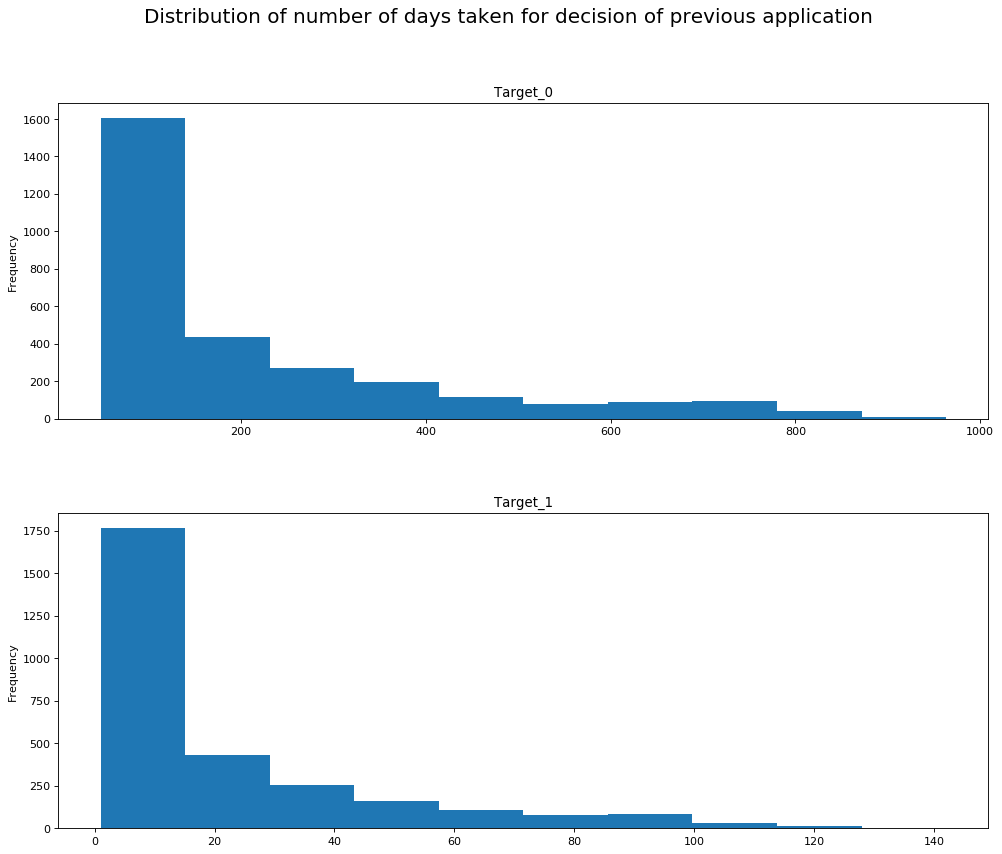

In [112]:
#3. DAYS_DECISION

plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
master_df_t0.DAYS_DECISION.value_counts().plot.hist()

plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
master_df_t1.DAYS_DECISION.value_counts().plot.hist()
plt.suptitle("Distribution of number of days taken for decision of previous application",fontsize = 18)
plt.show()

1.From the graphs above it can be seen that, Relative to current application when was the decision about previous application made is enfluencing factor.<br>
2.Less the days for decision about previous application made,more likely to have payment difficulties

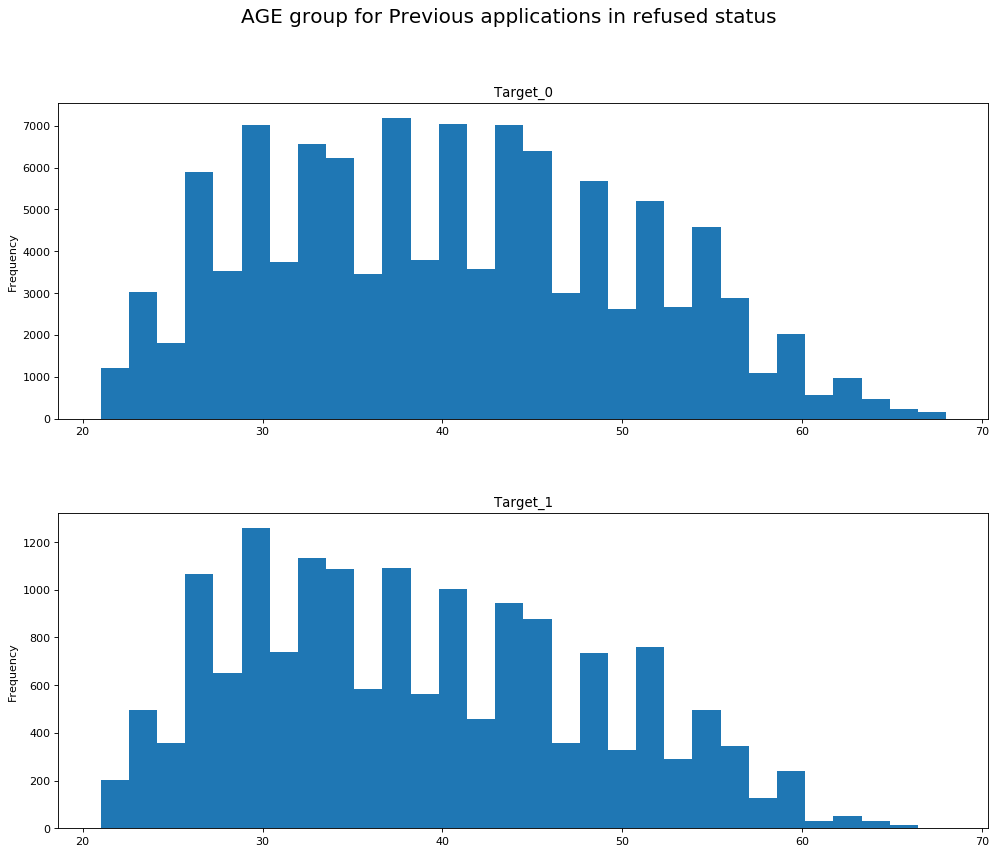

In [116]:
#AGE group for Previous applications in refused status

plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
master_df_t0[master_df_t0['NAME_CONTRACT_STATUS']== "Refused"].AGE.plot.hist(bins = 30)

plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
master_df_t1[master_df_t1['NAME_CONTRACT_STATUS']=="Refused"].AGE.plot.hist(bins = 30)
plt.suptitle("AGE group for Previous applications in refused status",fontsize = 18)
plt.show()

Number of refused applications who are having payment difficulties lies in the age group 25 to 40 and the frequncy decreasing as age increases.<br>
on the other hand,for group not having payment difficulties,diff in distribution of age group is not that significant.

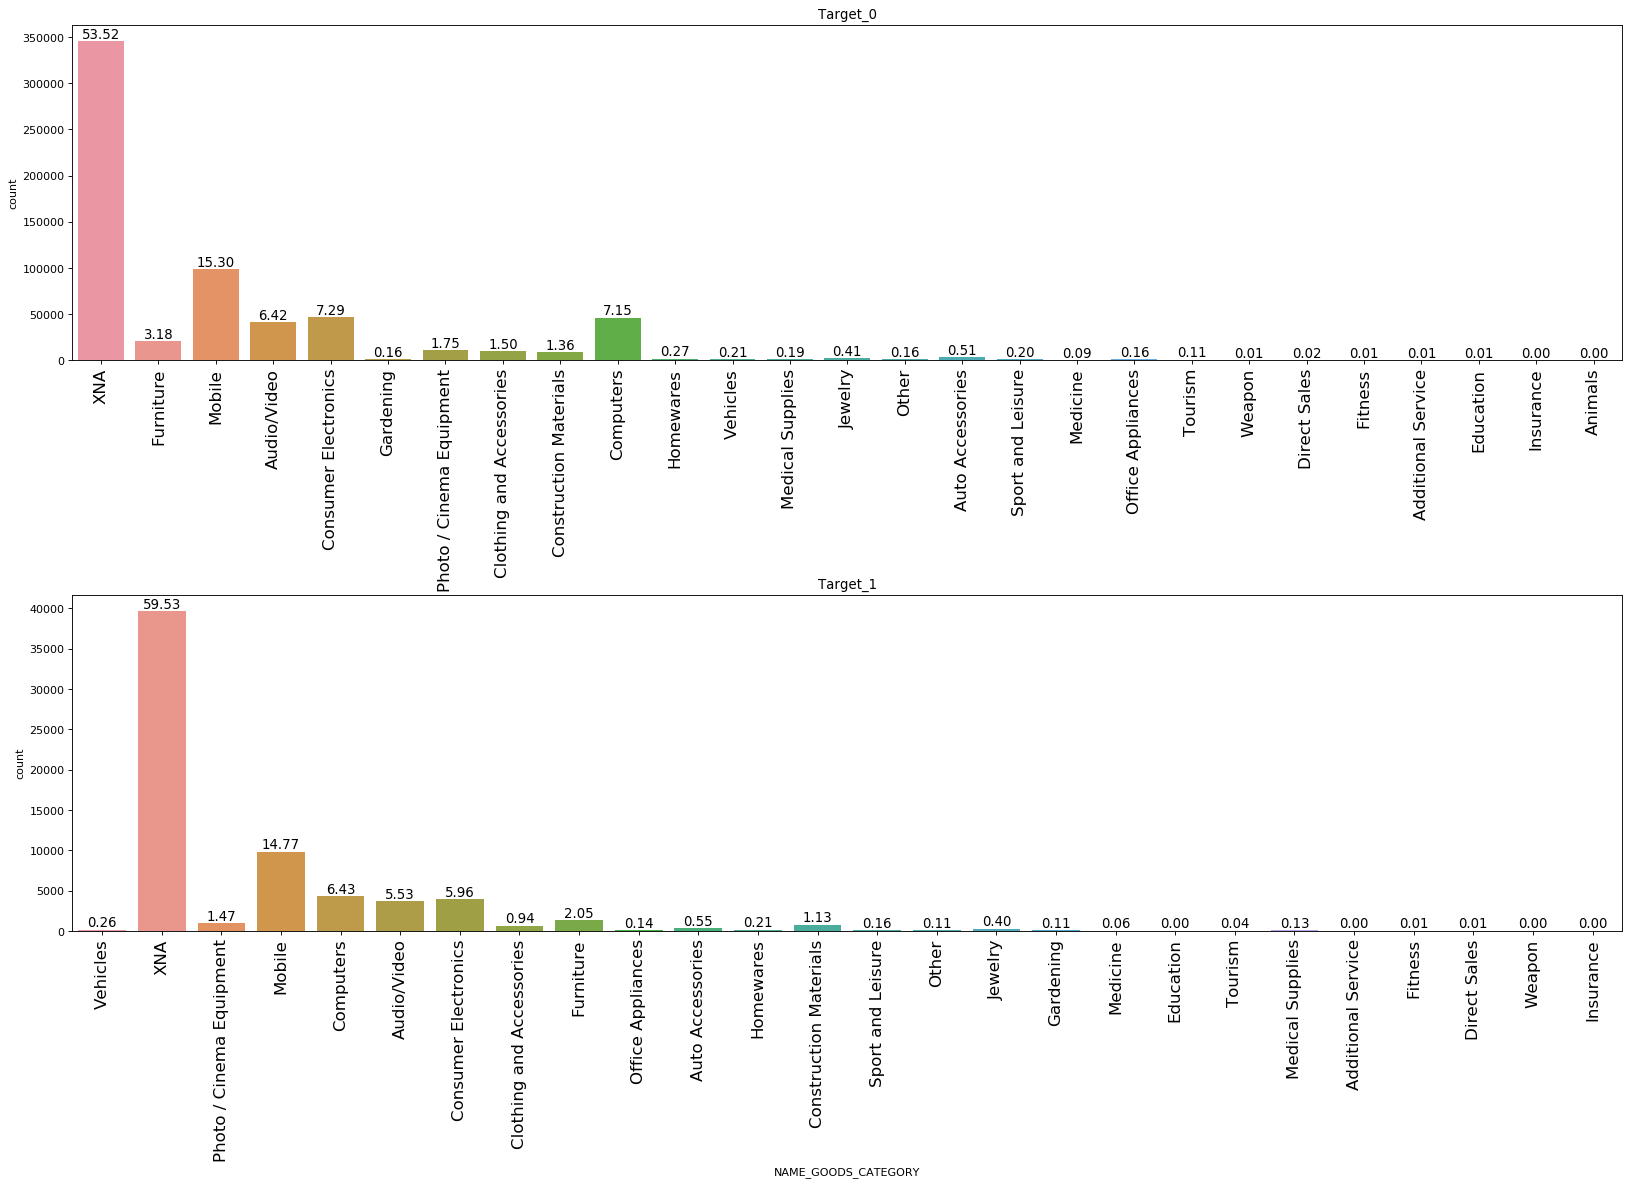

In [156]:
# NAME_GOODS_CATEGORY

plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_GOODS_CATEGORY',data = master_df_t0)
plt.xticks(rotation = 90,fontsize = 15)
add_labels_per(plt.gca())
plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_GOODS_CATEGORY',data = master_df_t1)
plt.xticks(rotation = 90,fontsize = 15)
add_labels_per(plt.gca())
plt.show()

No significance difference found for Goods category !

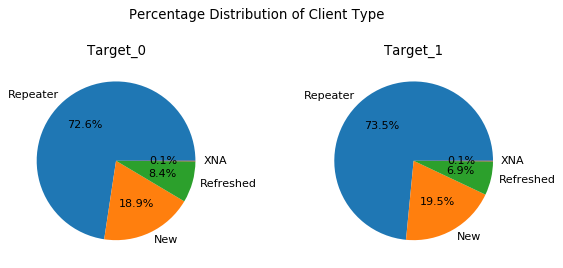

In [157]:
#NAME_CLIENT_TYPE

plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
master_df_t0['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
master_df_t1['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Client Type")
plt.show()

No significant difference for Client type ! 

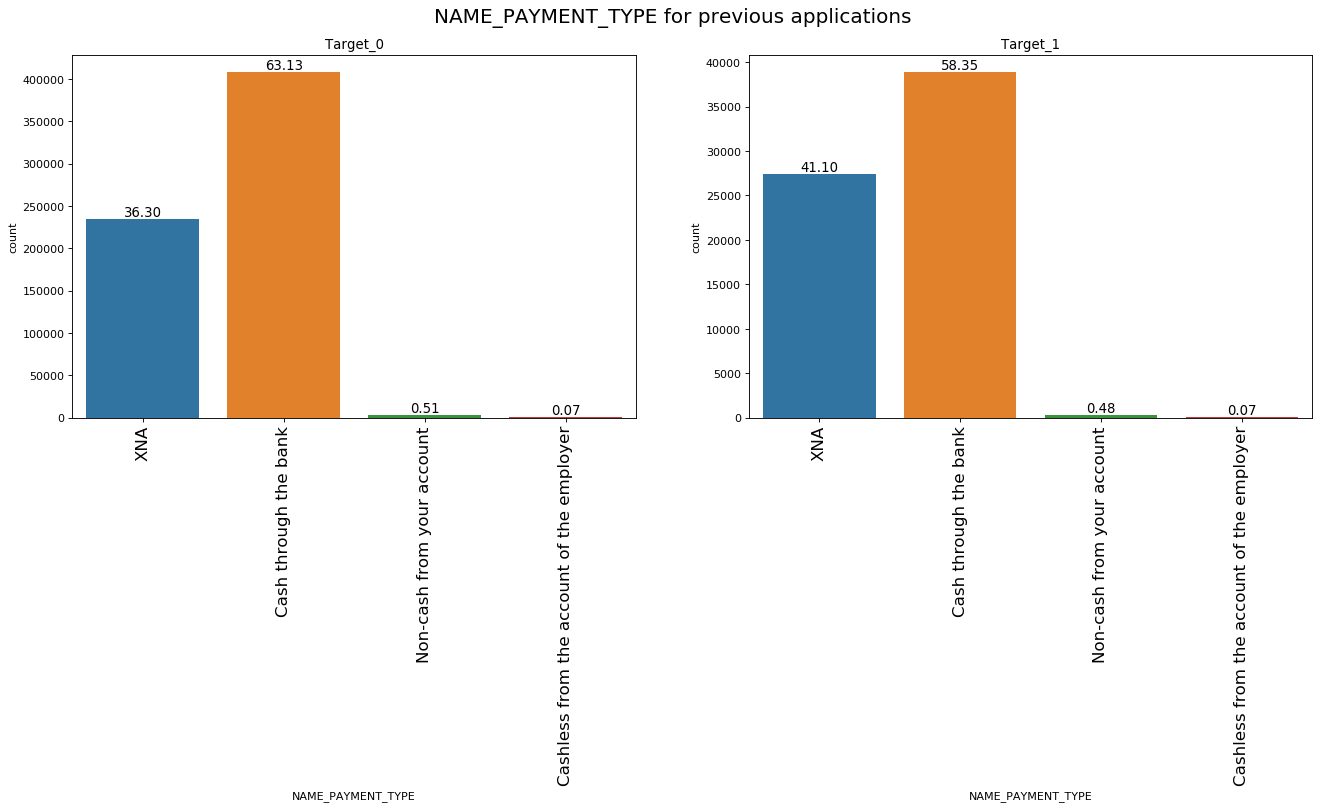

In [159]:
#NAME_PAYMENT_TYPE

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_PAYMENT_TYPE',data = master_df_t0)
plt.xticks(rotation = 90,fontsize = 15)
add_labels_per(plt.gca())
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_PAYMENT_TYPE',data = master_df_t1)
plt.xticks(rotation = 90,fontsize = 15)
plt.suptitle("NAME_PAYMENT_TYPE for previous applications",fontsize = 18)
add_labels_per(plt.gca())
plt.show()

No significant difference found !

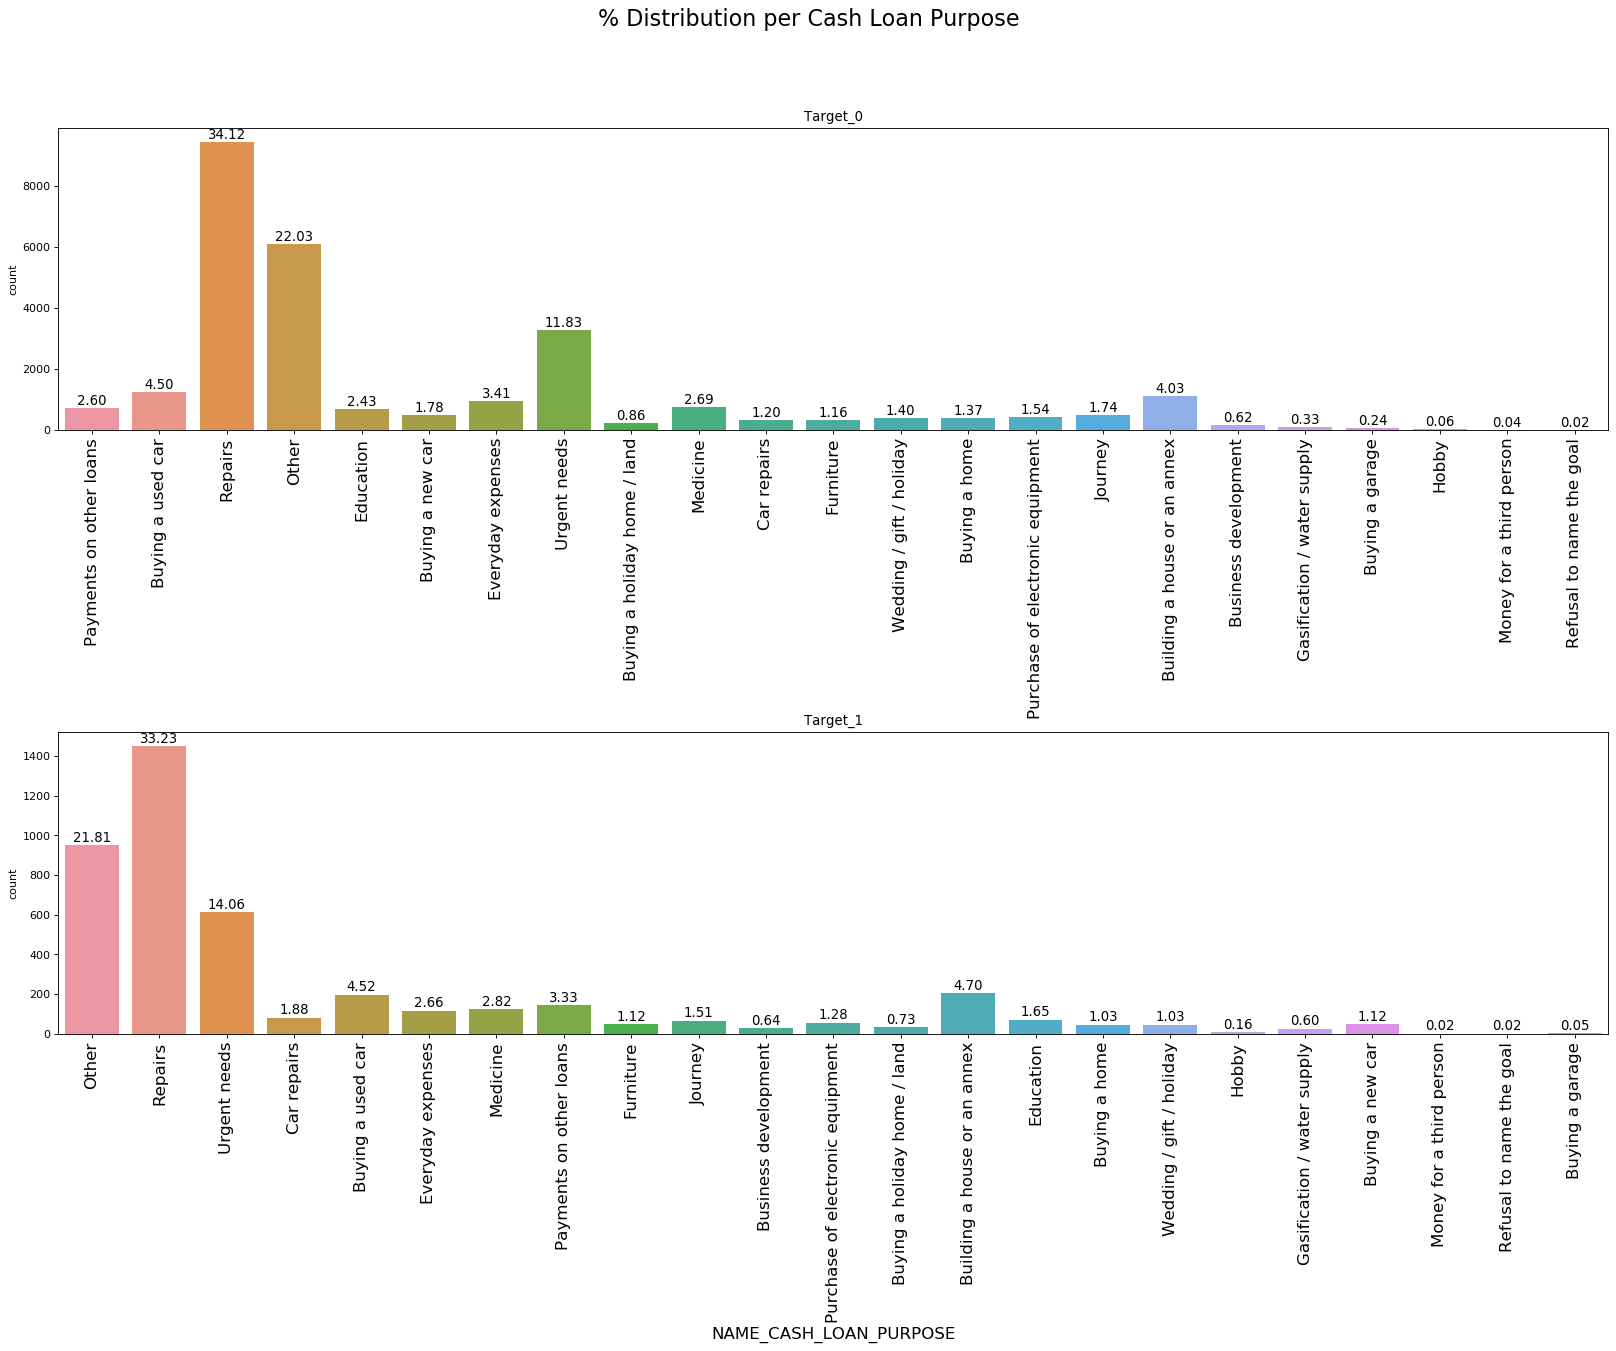

In [173]:
# NAME_CASH_LOAN_PURPOSE

# % contribution of CASH_LOAN_PURPOSE (XNA excluded as around 80% rows are marked XNA)

plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=1.0, wspace=0.5)

plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data = master_df_t0[(master_df_t0['NAME_CONTRACT_TYPE_y']=="Cash loans") & (master_df_t0['NAME_CASH_LOAN_PURPOSE']!="XNA")])
plt.xticks(rotation = 90,fontsize = 15)
plt.xlabel("")
add_labels_per(plt.gca())
plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data = master_df_t1[(master_df_t1['NAME_CONTRACT_TYPE_y']=="Cash loans") & (master_df_t1['NAME_CASH_LOAN_PURPOSE']!="XNA")])
plt.xticks(rotation = 90,fontsize = 15)
plt.xlabel("NAME_CASH_LOAN_PURPOSE",fontsize = 15)
add_labels_per(plt.gca())
plt.suptitle("% Distribution per Cash Loan Purpose",fontsize = 20)
plt.show()

No significance difference between both sets.One cannot conclude on basis of cash loan purpose if client is likely to default or not.

#### Bivariate Analysis

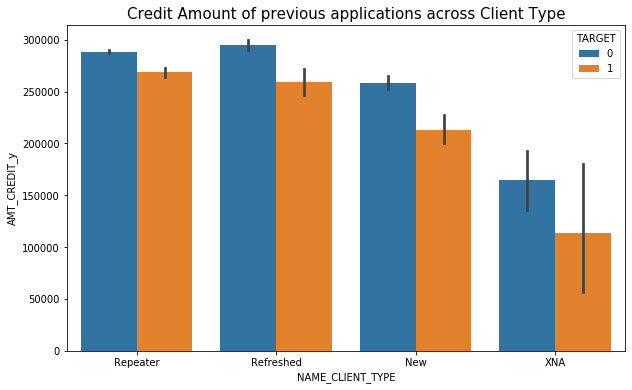

In [208]:
#Numerical vs Categorical

#Total income for across NAME_CONTRACT_STATUS

plt.figure(figsize = (10,6))
sns.barplot(y = "AMT_CREDIT_y",x  = 'NAME_CLIENT_TYPE' , data = master_df[(master_df['NAME_CONTRACT_TYPE_y']== "Cash loans") | (master_df['NAME_CONTRACT_TYPE_y']== "Revolving loans")],hue = 'TARGET')
#add_labels_per(plt.gca())
plt.title("Credit Amount of previous applications across Client Type",fontsize = 15)
plt.show()

Notes from above graph : 
1. Credit amount for Revolvinsting loans and Cash loans are checked against client type for previous applications.<br>
2. There is no significant difference seen for Reapeater/Refreshed/New types.<br>
3. For client type 'New' who are likely to default have average credit amount < 250000 

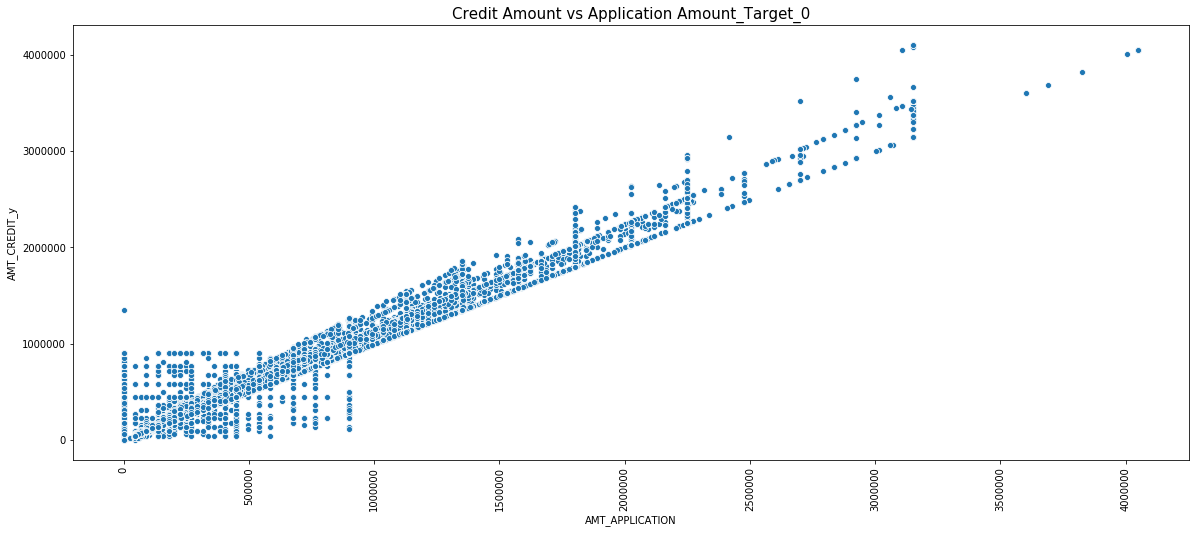

In [220]:
# Numerical vs Numerical
# To check how Application amount vary with Credit amount

#1. Target_0
plt.figure(figsize = (20,8))
sns.scatterplot(y ='AMT_CREDIT_y',x  = 'AMT_APPLICATION' , data = master_df_t0[(master_df_t0['NAME_CONTRACT_STATUS']=="Refused")& ((master_df_t0['NAME_CONTRACT_TYPE_y']== "Cash loans") | (master_df_t0['NAME_CONTRACT_TYPE_y']== "Revolving loans"))])
plt.title("Credit Amount vs Application Amount_Target_0",fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


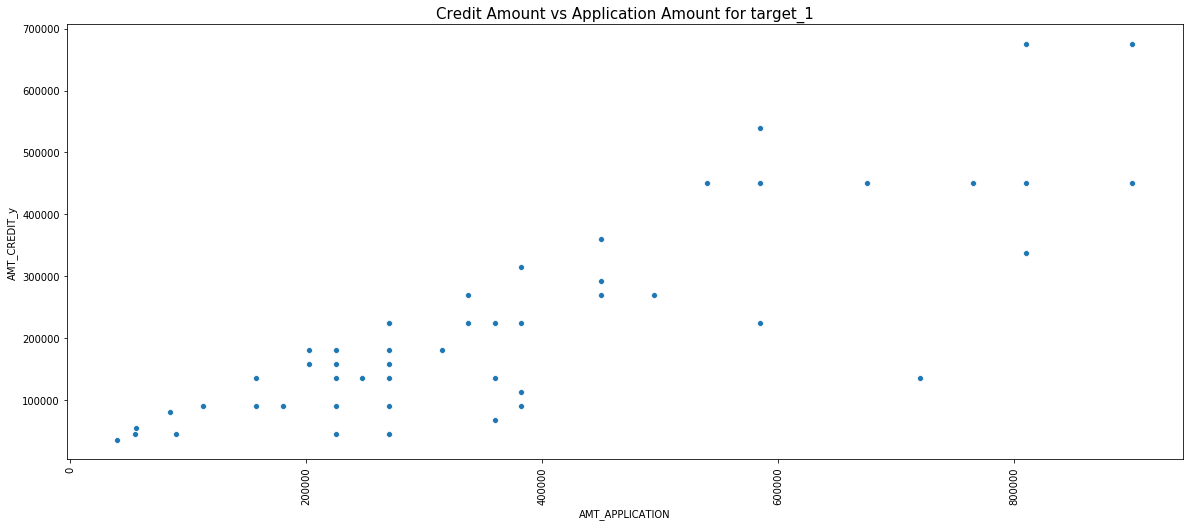

In [221]:
#Target_1
plt.figure(figsize = (20,8))
sns.scatterplot(y ='AMT_CREDIT_y',x  = 'AMT_APPLICATION' , data = master_df_t1[(master_df_t1['NAME_CONTRACT_STATUS']=="Refused")& ((master_df_t1['NAME_CONTRACT_TYPE_y']== "Cash loans") | (master_df_t1['NAME_CONTRACT_TYPE_y']== "Revolving loans"))])
plt.title("Credit Amount vs Application Amount for target_1",fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

From above graph trying to see how Application amount and Credit amount varies for previous application and does if it impacts client to have payment difficulties. 
Most of the clients from Target 1 have difference in Intial amount apllied for loan and final credit amount approved.


### Key Points :

The most influencing factors  from the both current and previous application data sets are as below :

1.Family Status  (Married clients tend to have less chance of becoming defaulters.)

2.Occupation type  and Organization type
(Both the points give strong evidence for not to default if fall under certain common types)

3.Clients Total Income ( less the income more likely to default).Also the respective Amount Credit/Goods Price/Annuity should be verified. For defaulters its inversely correlated.

4.Income type (Students/Pensioners/Businessman are absolute non defaulters. )

5.Age of Client (Trend from current as well as previous application shows age group from 32 to 45 yrs are likely to default)

6.Previous application contract status (24.5% previous application in refused status contribute in defaulters list)

7.Rejection reason for previous application should be checked to verify compliance check/blacklisted customer etc)

8.Number of days taken for decision of previous applications (Less the number of days , more likely to default)

9.Client type against credit amount should be verified.